# Stock Market Price’s Growth Analysis 

[Team Video](presentation.mp4)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [   ] NO - keep private

# Overview

The stock prices of firms are direct representation of their well-being and potential development, which is associated with numerous indices calculated based on their balance sheet. In our research, we chose the return on equity (roe), price–earnings ratio (pe ratio), and net profit to total revenue out of all indices to investigate their influence on the changes in the stock prices. We conducted the analysis through the 2D scatterplot with overlaid regression line, drawing heatmap, and explore on the OLS regression result. To sum up, despite the statistically significant for some variables, our results prove little practical significance on the changes in the stock prices and the relationship between them are tenuous.

# Names

- Irene Jiang
- Junlin Wu
- Shixuan Wu
- Mengyuan Zhang

<a id='research_question'></a>
# Research Question

Is there a relationship between combination of (return on equity, pe ratio,net profit to total revenue) and Chinese stock price growth rate in percentage for companies within the consumer goods industry in 2014-2020?

<a id='background'></a>

## Background & Prior Work

The Return on equity is highly deterministic for a company’s profitability, which is directly related to the company’s stock price and growth rate. Therefore we want to investigate if higher ROE would lead to higher stock price growth. More specifically, we want to investigate the relationship of ROE in the consumer industry as we found out that ROE varies a lot across industries and doesn’t make sense to compare different industries all together (1). As the article points out though, high ROE might not necessarily indicate the better performance of a company, so our group is going to investigate this specific ratio and get data from over hundreds of companies and over many years to see if ROE is in general, leading to higher stock price growth rate. We also looked at factors that could affect stock price. We discovered two factors that we totally did not know. Liquidity is one that tells how volatile a stock’s price is and demographics explains age groups’ preference to sell or keep or buy. We will try to incorporate data that have a measurement for stock’s volatility and average holder age to incorporate the two factors(2).


References (include links):
- 1) The ROE is the measure of a company's net income divided by its shareholders' equity. Investors usually look at whether the company’s ROE is bad or good before they make investment. ROE could vary in different industries. For example, in the utility industry, a good ROE could be around 10% while in the technology industry, companies usually have an ROE that is higher than 18%. However, A high ROE might not always be positive and could be misleading sometimes. An outsize ROE can be indicative of a number of issues—such as inconsistent profits or excessive debt, which is not directly linked to the company’s profit.
    - https://www.investopedia.com/terms/r/returnonequity.asp

- 2) This article talks about the factors that could affect the stock price and briefly discusses the reason behind each factor. The factors include inflation, substitutes, short-term trend, liquidity, etc. The most interesting two for us are liquidity which describes how volatile a stock’s price is and demographics which shows that middle age people tend to buy into the market whereas older people like selling and quitting the market. These factors will help us in our course of finding the answer to our research question.
    - https://www.investopedia.com/articles/basics/04/100804.asp

# Hypothesis


There is a positive correlation between the return on equity, pe ratio, and net profit to total revenue and the Chinese stock price’s growth rate for companies within the consumer goods industry in 2014-2020.

Usually a company on the right track will have its stock price rising. The positive growth of that stock will attract more buyers which in turn will show the company what they are doing is the right move. As companies move in the right direction, its value will keep increasing and its stockholders can easily sell off the stock to get profit and thus higher return on equity.

# Dataset(s)

- Dataset Name: JointQuant
- Link to the dataset: https://www.joinquant.com/
- Number of observations: 2470

The dataset consists all the stock's valuation metrics such as pe,pb ratios, and also the metrics that measures company's profit, such as the roe and net profit. It also consists the daily close price for each stock.

## Variables Explanations

- Net Profit to Total Revenue
    - Gross profit is revenue - cost of the good or service. Net profit refers to gross profit minus the cost of the companies' operations like people's salaries, taxes, etc. Net profit to total revenue thus refers to the ratio of net profit versus the company's total revenue. If this number is high, it means that a large portion of the companies' income can be converted to profit, suggesting a high earning ability of the company.
- PE Ratio
    - PE ratio stands for Price-to-Earnings Ratio. It refers to the ratio between the price per share of the company versus earnings per share of the company. While price per share is easy to find by looking at the price of the stock, EPS (earnings per share) is calculated with the formula: a company's net profit divided by the number of common shares it has outstanding. Outstanding shares simply mean the total number of shares issued and actively held by stockholders—both outside investors and corporate insiders. Thus, a low PE ratio means that relative to the stock's money making ability, the price is too low, meaning that the stock is undervalued, and vice versa.
- ROE
    - ROE stands for Return On Equity. It is calculated by: net income of the company divided by shareholder equity. Net income refers to the total income of the company minus the cost, including both goods' or services' cost, companies' operation cost, and taxes. Shareholder equity is all the assets that the company owns minues all the liabilities like debts that the company has. ROE, therefore, measures the how well the company is using its equity to generate income. The higher the ROE, the better the company is in terms of generating profit.
- Price
    - In this analysis, price simply means price per stock measured in Chinese Yuan.

# Setup

In [1]:
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (60, 20)

from jqdatasdk import *
import pandas as pd
from scipy import stats
import numpy as np
import patsy
import statsmodels.api as sm

In [2]:
auth("13160250367", "807207352xZ")


# get the stock price of a single stock
def get_single_stock_price(ticker, timePeriod, stadate=None, endate=None):
    if stadate is None:
        stadate = get_security_info(ticker).start_date
    if endate is None:
        endate = datetime.datetime.today()
    data = get_price(ticker, start_date=stadate, end_date=endate,
                     frequency=timePeriod, panel=False)
    return data

auth success 


In [3]:
# check out the original raw data
# first type of table contains attributes such roe, eps, roa, etc.
data1 = get_fundamentals(query(indicator), statDate="2020")
data1.head()

id         code    statDate     pubDate  statDate.1     eps  \
0  171577  002107.XSHE  2020-12-31  2021-01-21  2020-12-31  0.3100   
1  171578  300617.XSHE  2020-12-31  2021-01-27  2020-12-31  1.0400   
2  171579  002072.XSHE  2020-12-31  2021-01-30  2020-12-31 -1.1505   
3  171580  000001.XSHE  2020-12-31  2021-02-02  2020-12-31  1.4000   
4  171581  002984.XSHE  2020-12-31  2021-02-02  2020-12-31  1.6400   

   adjusted_profit  operating_profit  value_change_profit      roe  ...  \
0     1.689852e+08      2.144060e+08         6.929258e+06  24.1832  ...   
1     1.147333e+08      1.537405e+08         1.157211e+07  15.1237  ...   
2    -1.997336e+08      4.746487e+06        -1.220019e+06      NaN  ...   
3     2.884000e+10      2.660900e+10         1.006900e+10   8.5445  ...   
4     1.032878e+09      1.081340e+09        -3.364985e+07  21.4094  ...   

   inc_total_revenue_year_on_year  inc_total_revenue_annual  \
0                         16.9467                       NaN   
1                         66.2652                       NaN   
2                         72.9901                       NaN   
3                         11.2962                       NaN   
4                          2.7619                       NaN   

   inc_revenue_year_on_year  inc_revenue_annual  \
0                   16.9467                 NaN   
1                   66.2652                 NaN   
2                   72.9901                 NaN   
3                   11.2962                 NaN   
4                    2.7619                 NaN   

   inc_operation_profit_year_on_year  inc_operation_profit_annual  \
0                            99.7706                          NaN   
1                           115.9822                          NaN   
2                          -902.6573                          NaN   
3                             1.7085                          NaN   
4                            33.7286                          NaN   

   inc_net_profit_year_on_year  inc_net_profit_annual  \
0                      91.6117                    NaN   
1                     108.8248                    NaN   
2                   -2468.8934                    NaN   
3                       2.5998                    NaN   
4                      32.3773                    NaN   

   inc_net_profit_to_shareholders_year_on_year  \
0                                      86.7198   
1                                     108.0783   
2                                   -2470.7102   
3                                       2.5998   
4                                      32.3773   

   inc_net_profit_to_shareholders_annual  
0                                    NaN  
1                                    NaN  
2                                    NaN  
3                                    NaN  
4                                    NaN  

[5 rows x 36 columns]

In [4]:
data1.describe()

id          eps  adjusted_profit  operating_profit  \
count    4250.000000  4250.000000     4.250000e+03      4.250000e+03   
mean   173753.451294     0.491632     8.169664e+08      9.277324e+08   
std      1244.741969     1.322690     8.943153e+09      8.860187e+09   
min    171577.000000   -10.270000    -5.569919e+10     -1.561900e+11   
25%    172676.250000     0.080000     1.027874e+07      2.890374e+07   
50%    173756.500000     0.320000     9.132726e+07      1.310238e+08   
75%    174831.750000     0.768825     3.181381e+08      4.123572e+08   
max    175946.000000    37.170000     3.140970e+11      2.711300e+11   

       value_change_profit          roe   inc_return          roa  \
count         4.049000e+03  4212.000000  4212.000000  4250.000000   
mean          4.063340e+08     4.151810     0.317494     3.395517   
std           4.636535e+09    39.190020    54.518285    19.556052   
min          -1.807795e+10 -1287.833600 -2021.269300  -911.692400   
25%           1.049935e+06     2.755475     0.854425     1.231850   
50%           1.091704e+07     7.719550     5.870600     4.001550   
75%           5.418380e+07    13.047525    11.127925     7.825000   
max           2.111010e+11   248.950900   186.758400   448.898000   

       net_profit_margin  gross_profit_margin  ...  \
count        4250.000000          4156.000000  ...   
mean          -72.723361            29.679365  ...   
std          3466.596166            23.791304  ...   
min       -217591.211100          -594.275400  ...   
25%             2.385475            16.834025  ...   
50%             7.898800            27.185300  ...   
75%            15.485375            40.074450  ...   
max          4731.507400            99.900700  ...   

       inc_total_revenue_year_on_year  inc_total_revenue_annual  \
count                     4249.000000                       0.0   
mean                        19.216170                       NaN   
std                        483.903266                       NaN   
min                        -97.021700                       NaN   
25%                         -9.861000                       NaN   
50%                          4.442900                       NaN   
75%                         17.994500                       NaN   
max                      26327.128900                       NaN   

       inc_revenue_year_on_year  inc_revenue_annual  \
count               4249.000000                 0.0   
mean                  19.301784                 NaN   
std                  483.939130                 NaN   
min                  -97.985100                 NaN   
25%                  -10.006000                 NaN   
50%                    4.390600                 NaN   
75%                   18.024000                 NaN   
max                26327.128900                 NaN   

       inc_operation_profit_year_on_year  inc_operation_profit_annual  \
count                        4250.000000                          0.0   
mean                         -112.409234                          NaN   
std                          4609.505246                          NaN   
min                       -208630.070400                          NaN   
25%                           -29.411725                          NaN   
50%                             8.445000                          NaN   
75%                            50.341050                          NaN   
max                         64649.769300                          NaN   

       inc_net_profit_year_on_year  inc_net_profit_annual  \
count                  4250.000000                    0.0   
mean                   -168.711102                    NaN   
std                    3552.159330                    NaN   
min                 -166636.201300                    NaN   
25%                     -30.182525                    NaN   
50%                       8.929900                    NaN   
75%                      50.752675                    NaN   
max           

In [5]:
# second type of table contains attributes such as pe ratio, pb_ratio, market_cap, etc.
data2 = get_fundamentals(query(valuation), statDate="2020")
data2.head()

id         code  pe_ratio  turnover_ratio  pb_ratio  ps_ratio  \
0  62050271  600247.XSHG   -4.4233          1.7397   -3.5401   28.8651   
1  62047026  600634.XSHG    1.5413             NaN    5.4177    1.0212   
2  62046781  600146.XSHG   -5.0789          6.2738    0.6460    2.5341   
3  62047751  002071.XSHE   -0.5159          5.8861   -0.5961    2.0987   
4  62047720  603996.XSHG   -0.2552          1.0356   -0.5817    4.6793   

   pcf_ratio  capitalization  market_cap  circulating_cap  \
0   426.7362      33644.1602      3.9027       33644.1602   
1    -2.2706      57573.2070      4.7210       57573.2070   
2   -14.8962      46997.0000      4.8407       46997.0000   
3   -26.4867      52542.9883      5.0441       52251.1289   
4    -8.4600      30015.0000      5.4627       30015.0000   

   circulating_market_cap         day  pe_ratio_lyr  
0                  3.9027  2020-12-31       -4.6085  
1                  4.7210  2020-12-31        0.3767  
2                  4.8407  2020-12-31       -1.6197  
3                  5.0161  2020-12-31       -0.5339  
4                  5.4627  2020-12-31       -0.2799

In [6]:
data2.describe()

id       pe_ratio  turnover_ratio      pb_ratio  \
count  4.140000e+03    4140.000000     4117.000000   4140.000000   
mean   6.204832e+07     -65.106651        2.604260      8.605589   
std    1.195259e+03    9631.093041        4.121261    286.155584   
min    6.204625e+07 -609435.630500        0.021500   -479.475400   
25%    6.204729e+07      10.961125        0.721400      1.610400   
50%    6.204832e+07      29.267950        1.412600      2.633500   
75%    6.204936e+07      58.077200        2.895000      4.449925   
max    6.205039e+07   95409.819900       75.692700  18394.509800   

           ps_ratio      pcf_ratio  capitalization    market_cap  \
count   4140.000000    4140.000000    4.140000e+03   4140.000000   
mean      30.644752     -59.776191    1.777503e+05    209.858063   
std     1030.654366    4853.103457    1.097830e+06    847.302064   
min     -115.964500 -221411.265600    4.000000e+03      3.902700   
25%        1.556575     -24.886625    2.563538e+04     31.161300   
50%        3.225350      14.168450    5.485650e+04     54.913200   
75%        6.844725      53.809600    1.181153e+05    130.353900   
max    60425.464800   94335.023400    3.564062e+07  25098.832000   

       circulating_cap  circulating_market_cap  pe_ratio_lyr  
count     4.140000e+03             4140.000000   4140.000000  
mean      1.354226e+05              155.100399     70.561629  
std       7.996126e+05              676.389890    224.671032  
min       9.077057e+02                2.128700  -6832.846700  
25%       1.800000e+04               21.247575     16.742500  
50%       4.569615e+04               40.872150     35.223150  
75%       1.002724e+05               96.321150     73.719350  
max       2.940553e+07            25098.832000   4146.573200

In [7]:
# third type of table contains a single's stock information on the given date
get_single_stock_price("000001.XSHG", "daily",
                       stadate="2015-12-31",
                       endate="2015-12-31")

open    close    high      low        volume         money
2015-12-31  3570.47  3539.18  3580.6  3538.35  1.769637e+10  2.540311e+11

# Data Cleaning

1. We first acquire the value of roe, net_profit_to_total_revenue from the indicator part of database, then we also require the values of pe ratio from the valuation part of database
2. We change the column name to indicate the year of the data
3. By changing the type of data into a more workable type, the future operation will be easier.
4. We combine the column of different year of data into one table
5. We write the funciton to get the difference percentage point between the neighboring years.

In [8]:
#  here, we acquire data as well as clean them and preprocess them
def get_data(l: list, attr1: list, attr2: list) -> pd.DataFrame:
    result = None
    # loop through each year
    for year in l:
        if result is None:
            # get each value using indiactor or valuation
            roe = get_fundamentals(query(indicator), statDate=year).loc[:, attr1]
            pe = get_fundamentals(query(valuation), statDate=year).loc[:, attr2]
            # merge data we get from two query
            result = roe.merge(pe, on="code")
            new_column_names = []
            # change the column names to indicate the year
            for i in result.columns:
                if i == "code":
                    new_column_names.append(i)
                else:
                    new_column_names.append(i + "_" + str(year))
            result.columns = new_column_names
        else:
            # combines the roe and pe ratio into one dataframe
            roe = get_fundamentals(query(indicator), statDate=year).loc[:, attr1]
            pe = get_fundamentals(query(valuation), statDate=year).loc[:, attr2]
            new_data = roe.merge(pe, on="code")
            result = result.merge(new_data, on="code", how="inner", suffixes=(None, "_{}".format(year))).dropna()

    new_column_names = []
    # append year into column name
    for i in result.columns:
        if i == "code":
            new_column_names.append(i)
            continue
        try:
            int(i[-4:])
            new_column_names.append(i)
        except ValueError as E:
            new_column_names.append(i + "_{}".format(l[1]))
    result.columns = new_column_names

    # get price
    for year in l:

        # print so that we know the progress
        print("Start getting stock prices of {}".format(year))

        # 12-31 could be on a weekend and no trade will happen on that day thus no data.
        # Therefore, we use try and except to get data from either 12-31, 12-30, or 12-29, since at least one day will have data.
        try:
            result["price_{}".format(year)] = result["code"].apply(lambda x: get_single_stock_price(x, "daily",
                                                                                                    stadate="{}-12-31".format(year),
                                                                                                    endate="{}-12-31".format(year))["close"][0])
        except KeyError as e:
            try:
                result["price_{}".format(year)] = result["code"].apply(lambda x: get_single_stock_price(x, "daily",
                                                                                                        stadate="{}-12-30".format(year),
                                                                                                        endate="{}-12-30".format(year))["close"][0])
            except KeyError as e:
                try:
                    result["price_{}".format(year)] = result["code"].apply(lambda x: get_single_stock_price(x, "daily",
                                                                                                            stadate="{}-12-29".format(year),
                                                                                                            endate="{}-12-29".format(year))["close"][0])
                except KeyError as e:
                    result["price_{}".format(year)] = result["code"].apply(lambda x: get_single_stock_price(x, "daily",
                                                                                                            stadate="{}-12-28".format(year),
                                                                                                            endate="{}-12-28".format(year))["close"][0])
        # print so that we know the progress
        print("Finished getting stock prices of {}".format(year))

    return result.reset_index(drop=True)

In [9]:
%%time
# get data we need
result = get_data(list(range(2014, 2021)), ["code", "roe", "net_profit_to_total_revenue"], ["code", "pe_ratio"])

Start getting stock prices of 2014
Finished getting stock prices of 2014
Start getting stock prices of 2015
Finished getting stock prices of 2015
Start getting stock prices of 2016
Finished getting stock prices of 2016
Start getting stock prices of 2017
Finished getting stock prices of 2017
Start getting stock prices of 2018
Finished getting stock prices of 2018
Start getting stock prices of 2019
Finished getting stock prices of 2019
Start getting stock prices of 2020
Finished getting stock prices of 2020
Wall time: 14min 5s


In [10]:
# save the data into a csv file since getting it every time is quite time consuming
result.to_csv("data/stock_info_through_the_years.csv")

In [11]:
# read the csv file we have to see
# This is total around 2000 observation we acquire
data = pd.read_csv("data/stock_info_through_the_years.csv", index_col=0)
data.shape

(2470, 29)

In [12]:
# get a look of our data
data.head()

code  roe_2014  net_profit_to_total_revenue_2014  pe_ratio_2014  \
0  000099.XSHE    7.9019                           15.3643        37.0983   
1  000096.XSHE    2.2570                            4.3263        33.5305   
2  000090.XSHE   11.9606                            7.9548        20.4400   
3  600783.XSHG    9.5333                          132.5205        77.3879   
4  600782.XSHG    5.1865                            1.3226        20.8759   

   roe_2015  net_profit_to_total_revenue_2015  pe_ratio_2015  roe_2016  \
0    6.1879                           13.4537        50.3196    3.0574   
1    7.6137                           14.9687        51.0757   13.6838   
2    7.9759                            6.2108        26.7741    7.1723   
3    6.6846                          118.0795       137.0602   10.3357   
4    0.7503                            0.2146       303.2231    6.0313   

   net_profit_to_total_revenue_2016  pe_ratio_2016  ...  roe_2020  \
0                            7.6539        70.2396  ...    6.4720   
1                           32.7956       188.9197  ...    4.6856   
2                            7.1854        32.4868  ...   14.4660   
3                          205.4210        51.5633  ...    9.0761   
4                            1.6825        16.0105  ...   11.9451   

   net_profit_to_total_revenue_2020  pe_ratio_2020  price_2014  price_2015  \
0                           13.7044        23.2340       13.32       14.37   
1                           10.8283        36.4920        7.78       16.87   
2                            8.6938         4.7001        5.00        6.24   
3                          279.8700        18.1188       26.55       37.29   
4                            3.7925         5.5147        2.67        2.40   

   price_2016  price_2017  price_2018  price_2019  price_2020  
0       11.45        8.82        5.52        7.26        7.38  
1       14.59       13.12        9.20       11.36        9.67  
2        5.04        5.33        3.01        4.68        5.58  
3       21.68       14.86       15.26       15.41       14.63  
4        2.85        5.65        4.43        4.65        4.36  

[5 rows x 29 columns]

In [13]:
# our data have no missing values since we used dropna() and inner join
data.isna().any().any()

False

In [14]:
# take a look of all industries of stocks
get_industries().head()

name start_date
L72  商务服务业 1996-08-29
L71    租赁业 1997-01-30
G53  铁路运输业 1998-05-11
G57  管道运输业 1996-11-04
G56  航空运输业 1997-11-05

In [15]:
# select consumer industries
consumer_industries = [i for i in get_industries().index if i[0] == "C" or i[0] == "F"]

In [16]:
# get stocks that are in consumer industry
consumer_industries_stocks = set()
for i in consumer_industries:
    [consumer_industries_stocks.add(stock) for stock in get_industry_stocks(i)]
pd.Series(list(consumer_industries_stocks)).head()

0    600182.XSHG
1    002535.XSHE
2    002646.XSHE
3    300123.XSHE
4    688386.XSHG
dtype: object

In [17]:
# filter data
data = data.loc[data["code"].isin(consumer_industries_stocks), :]

In [18]:
data.shape

(1597, 29)

In [19]:
data.isna().any().any()

False

## How clean is the data?

We make sure the data type of the values in each columns is correct and ready to do any operation. For example, we changed the object type to string and check the values for roe and pe ratio are float. We will also calculate the changes in percentage of the roe, pe ratio, and net profit to total revenue, so that we could better compare them and draw any possible relation.

Then, for the preprocessing step we plan to do, we would check the distribution of our data. We will make sure that the roe, pe ratio, and net profit to total revenue are not linearly independent, which could potentially sabotage the accuracy of our research.

Also, we will plot the data to see whether they are normally distributed, and changes they into log scale if necessary. Once the data are normally distributed, we could apply the t test to find out the R square and other statistical parameters and answer our research questions.

# Data Analysis & Results

## EDA

In [20]:
# calculate growth of row, price, and pe ratio from year to year
for year in range(2015, 2021):
    data["roe_growth_{}".format(year)] = (data["roe_{}".format(year)] - data["roe_{}".format(year - 1)]) / data["roe_{}".format(year - 1)]
    data["price_growth_{}".format(year)] = (data["price_{}".format(year)] - data["price_{}".format(year - 1)]) / data["price_{}".format(year - 1)]
    data["pe_ratio_growth_{}".format(year)] = (data["pe_ratio_{}".format(year)] - data["pe_ratio_{}".format(year - 1)]) / data["pe_ratio_{}".format(year - 1)]

In [21]:
# look at the data with new columns
data.head()

code  roe_2014  net_profit_to_total_revenue_2014  pe_ratio_2014  \
1  000096.XSHE    2.2570                            4.3263        33.5305   
4  600782.XSHG    5.1865                            1.3226        20.8759   
5  600781.XSHG    4.0889                            3.6644       128.4387   
8  600785.XSHG   11.8761                            2.3250        13.6710   
9  600784.XSHG    3.0142                            1.2086        68.1003   

   roe_2015  net_profit_to_total_revenue_2015  pe_ratio_2015  roe_2016  \
1    7.6137                           14.9687        51.0757   13.6838   
4    0.7503                            0.2146       303.2231    6.0313   
5    8.3005                            7.1234       182.3531    4.8816   
8    7.6500                            1.4593        70.7935    3.3362   
9   -4.5578                           -3.4780       387.2989    2.7422   

   net_profit_to_total_revenue_2016  pe_ratio_2016  ...  pe_ratio_growth_2017  \
1                           32.7956       188.9197  ...             -0.880119   
4                            1.6825        16.0105  ...             -0.182062   
5                            4.4859       133.9732  ...              9.201276   
8                            0.4967       117.3998  ...             -0.704160   
9                            0.4207      -861.9310  ...             -0.785723   

   roe_growth_2018  price_growth_2018  pe_ratio_growth_2018  roe_growth_2019  \
1        -0.311475          -0.298780              0.708123         0.084445   
4         0.287521          -0.215929             -0.781934        -0.540665   
5         0.126252          -0.445175             -0.993050        -0.535941   
8         0.219564          -0.220936             -0.286284         0.213160   
9        -1.475243          -0.058271             -0.799465        -0.800065   

   price_growth_2019  pe_ratio_growth_2019  roe_growth_2020  \
1           0.234783              0.325030        -0.026247   
4           0.049661              0.244283        -0.288198   
5          -0.540711             -0.449973        -4.205646   
8          -0.081734             -0.047893        -0.774497   
9           0.037924             -5.141541        11.538156   

   price_growth_2020  pe_ratio_growth_2020  
1          -0.148768             -0.288090  
4          -0.062366              0.551994  
5          -0.385542             34.240688  
8          -0.146325              1.657498  
9           0.080769             -0.854394  

[5 rows x 47 columns]

In [22]:
# look all data statistics
data.describe()

roe_2014  net_profit_to_total_revenue_2014  pe_ratio_2014  \
count  1597.00000                       1597.000000    1597.000000   
mean      6.56847                          6.510792       1.048789   
std      14.46934                         39.368182    1400.780404   
min    -235.36910                       -756.599400  -43476.570400   
25%       2.48860                          1.929500      22.711400   
50%       6.47910                          5.333900      41.861700   
75%      11.67520                         11.877200      81.709600   
max     102.96910                        693.621100    5496.184900   

          roe_2015  net_profit_to_total_revenue_2015  pe_ratio_2015  \
count  1597.000000                       1597.000000    1597.000000   
mean      4.097106                          3.004914      87.469856   
std      24.282420                         58.710971    1849.326448   
min    -722.030800                      -1436.021600  -52586.986400   
25%       1.780100                          1.501100      27.049600   
50%       5.783700                          5.009900      62.053100   
75%      10.746200                         11.410100     134.486900   
max     114.340000                        580.871300   37805.835600   

          roe_2016  net_profit_to_total_revenue_2016  pe_ratio_2016  \
count  1597.000000                       1597.000000    1597.000000   
mean      5.810301                          5.180526      17.323292   
std      15.273343                         33.850679    3291.767878   
min    -247.385800                       -806.972500 -121497.305100   
25%       2.408000                          2.152800      22.520600   
50%       5.995800                          5.799900      48.479700   
75%      10.843100                         11.410700     101.860700   
max      74.135100                        203.309500   33685.120800   

          roe_2017  ...  pe_ratio_growth_2017  roe_growth_2018  \
count  1597.000000  ...           1597.000000      1597.000000   
mean      7.692197  ...             -0.288039        -1.790656   
std      26.977353  ...             16.440357        11.520840   
min    -311.679900  ...           -151.068472      -280.515319   
25%       2.902900  ...             -0.729865        -0.652131   
50%       6.450800  ...             -0.366463        -0.090893   
75%      11.831400  ...             -0.035815         0.197164   
max     871.503200  ...            619.264241        25.103817   

       price_growth_2018  pe_ratio_growth_2018  roe_growth_2019  \
count        1597.000000           1597.000000      1597.000000   
mean           -0.332942             -0.495917        -1.372645   
std             0.190095              3.275334        10.407501   
min            -0.825862            -60.836614      -235.098039   
25%            -0.451705             -0.727652        -0.758050   
50%            -0.351944             -0.479000        -0.121822   
75%            -0.247649             -0.263858         0.192165   
max             0.806593             67.327880        68.488563   

       price_growth_2019  pe_ratio_growth_2019  roe_growth_2020  \
count        1597.000000           1597.000000      1597.000000   
mean            0.277507              0.787497        -1.691694   
std             0.455035             43.238351        11.887494   
min            -0.763464           -151.613592      -258.346057   
25%             0.020408             -0.630901        -0.738976   
50%             0.173196              0.056316        -0.096101   
75%             0.430493              0.549471         0.300765   
max             3.923828           1703.858459        63.069358   

       price_growth_2020  pe_ratio_growth_2020  
count        1597.000000           1597.000000  
mean            0.233894             -0.176796  
std             0.580412             58.085539  
min            -0.923704           -941.196094  
25%            -0.105351             -0.836198  
5

### Roe_growth vs Price_growth

We plot the box plot for the roe_growth throught out the years to find out range for filtering the outlier.

<AxesSubplot:>

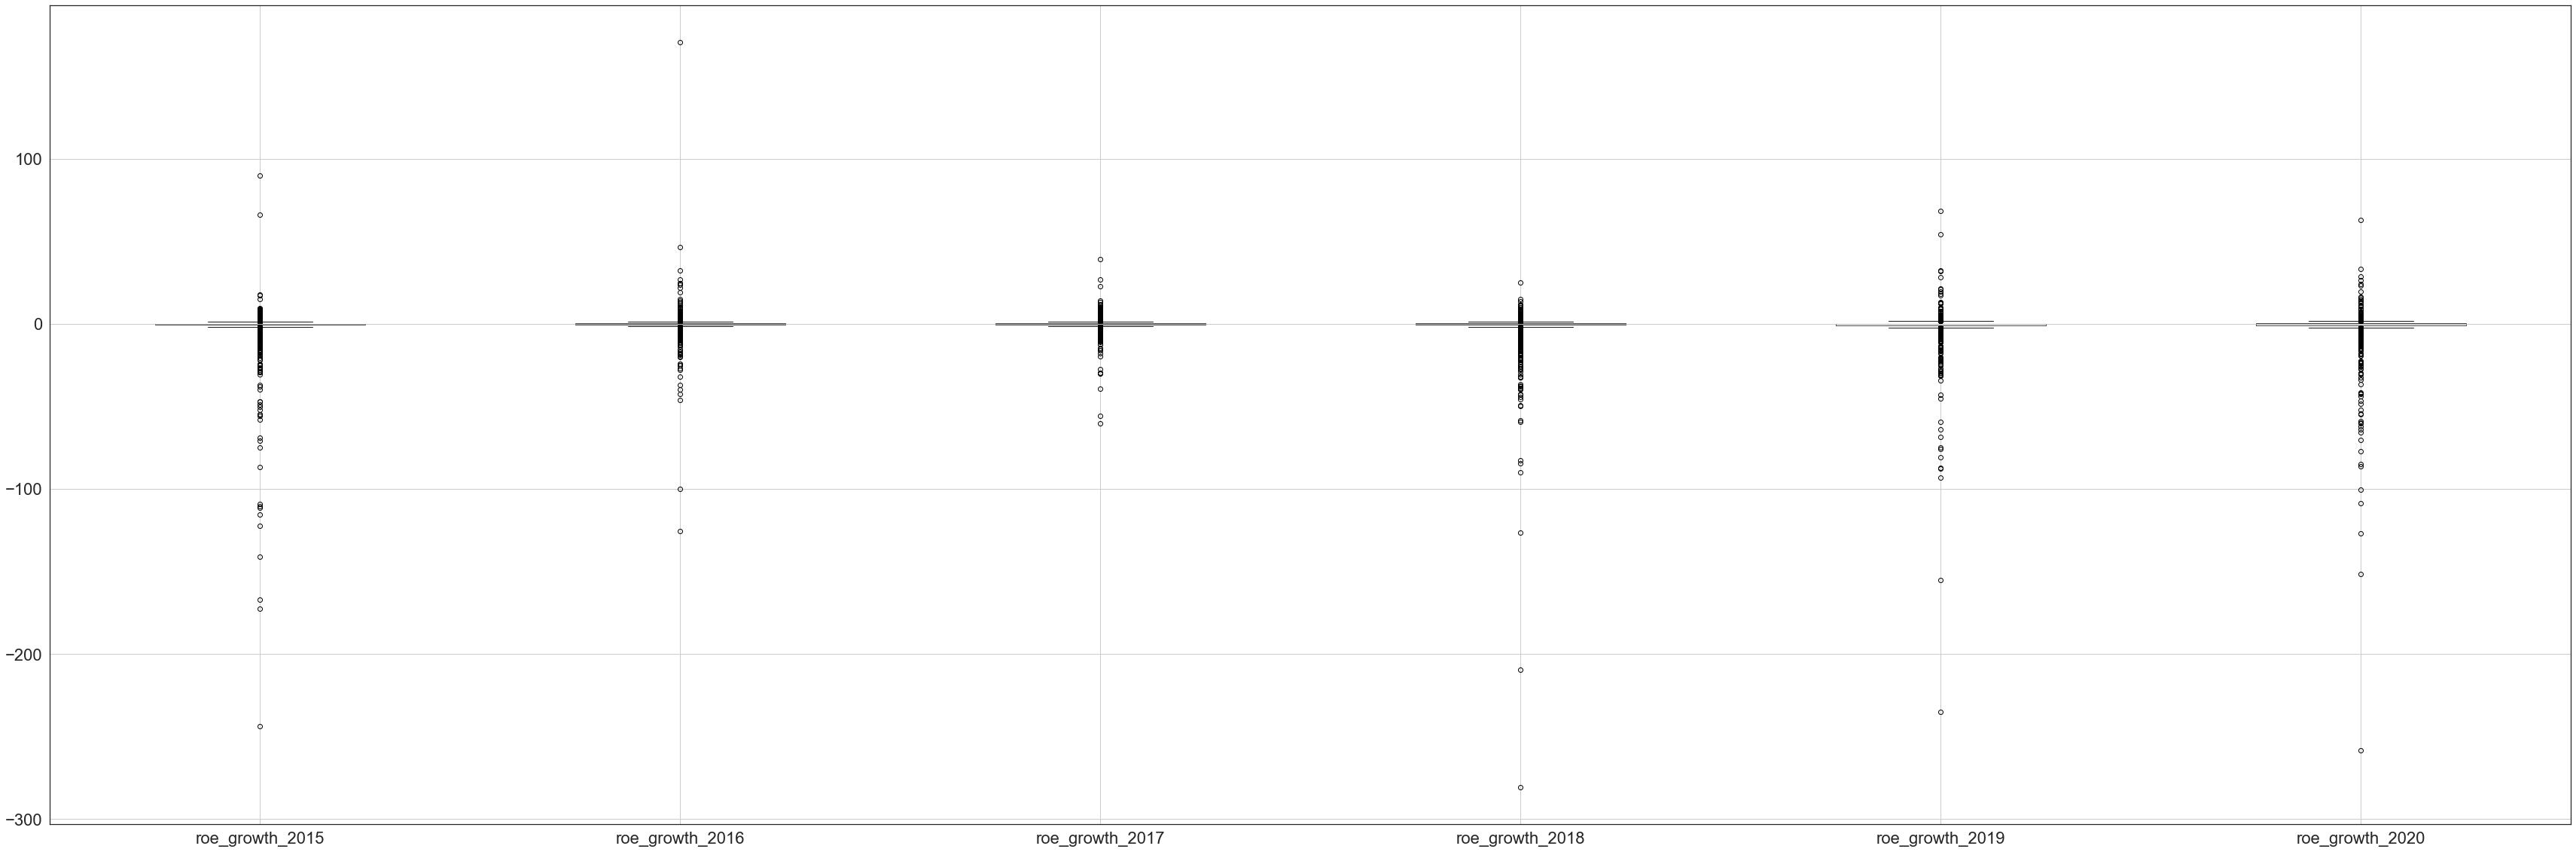

In [23]:
data[["roe_growth_2015", "roe_growth_2016", "roe_growth_2017", "roe_growth_2018", "roe_growth_2019", "roe_growth_2020"]].boxplot()

The boxplot clearly shows us the outlier data. According to the boxplot, most of the stocks see a growth or decline no more than single digit percent. The distribution mostly centers at zero. Many of our outliers have roe growth more than 30 percent, which is why we will choose to eliminate data points that deviate from the 0 by 30 more. The shape of the distribution is hard to see in this graph due to outliers, so we will explore the shape after excluding the outliers in scatter plot for better visualization.

Through that, we can filter the roe_growth data using the range selected.

In [24]:
data_drop_outliers = data
for i in range(2015, 2021):
    data_drop_outliers = data_drop_outliers[(data_drop_outliers["roe_growth_{}".format(i)] < 30) & (data_drop_outliers["roe_growth_{}".format(i)] > -30)]

Note that most of the outliers are companies that has been extremely successful or struggling in the recorded year. They will not be helpful in finding out the overall population trend that we are trying to seek as most companies only see mild growth or decline in a year.

Take a look at the data without outlier

In [25]:
data_drop_outliers.head()

code  roe_2014  net_profit_to_total_revenue_2014  pe_ratio_2014  \
1  000096.XSHE    2.2570                            4.3263        33.5305   
4  600782.XSHG    5.1865                            1.3226        20.8759   
5  600781.XSHG    4.0889                            3.6644       128.4387   
8  600785.XSHG   11.8761                            2.3250        13.6710   
9  600784.XSHG    3.0142                            1.2086        68.1003   

   roe_2015  net_profit_to_total_revenue_2015  pe_ratio_2015  roe_2016  \
1    7.6137                           14.9687        51.0757   13.6838   
4    0.7503                            0.2146       303.2231    6.0313   
5    8.3005                            7.1234       182.3531    4.8816   
8    7.6500                            1.4593        70.7935    3.3362   
9   -4.5578                           -3.4780       387.2989    2.7422   

   net_profit_to_total_revenue_2016  pe_ratio_2016  ...  pe_ratio_growth_2017  \
1                           32.7956       188.9197  ...             -0.880119   
4                            1.6825        16.0105  ...             -0.182062   
5                            4.4859       133.9732  ...              9.201276   
8                            0.4967       117.3998  ...             -0.704160   
9                            0.4207      -861.9310  ...             -0.785723   

   roe_growth_2018  price_growth_2018  pe_ratio_growth_2018  roe_growth_2019  \
1        -0.311475          -0.298780              0.708123         0.084445   
4         0.287521          -0.215929             -0.781934        -0.540665   
5         0.126252          -0.445175             -0.993050        -0.535941   
8         0.219564          -0.220936             -0.286284         0.213160   
9        -1.475243          -0.058271             -0.799465        -0.800065   

   price_growth_2019  pe_ratio_growth_2019  roe_growth_2020  \
1           0.234783              0.325030        -0.026247   
4           0.049661              0.244283        -0.288198   
5          -0.540711             -0.449973        -4.205646   
8          -0.081734             -0.047893        -0.774497   
9           0.037924             -5.141541        11.538156   

   price_growth_2020  pe_ratio_growth_2020  
1          -0.148768             -0.288090  
4          -0.062366              0.551994  
5          -0.385542             34.240688  
8          -0.146325              1.657498  
9           0.080769             -0.854394  

[5 rows x 47 columns]

We use scatter plot to see the distribution of the roe_growth after we drop the outlier and its relationship with the changes in prices.

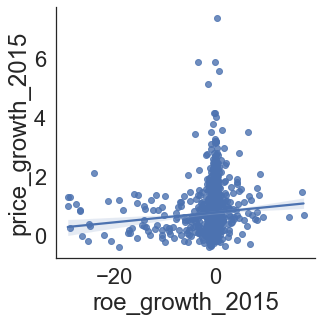

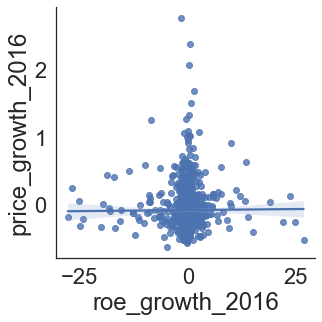

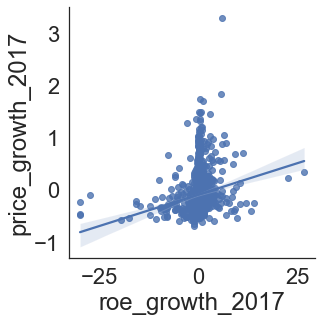

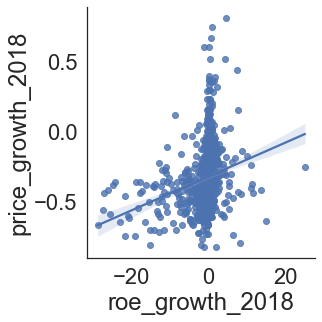

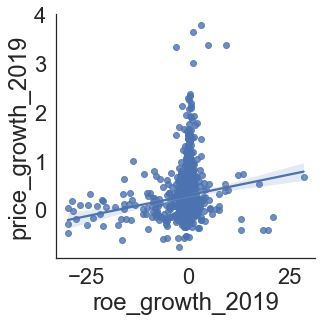

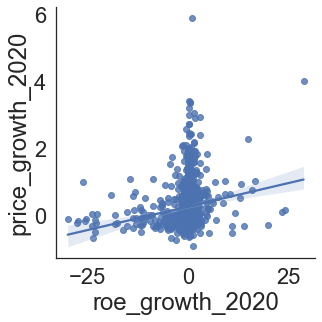

In [26]:
sns.lmplot(x="roe_growth_2015", y="price_growth_2015", data=data_drop_outliers)
sns.lmplot(x="roe_growth_2016", y="price_growth_2016", data=data_drop_outliers)
sns.lmplot(x="roe_growth_2017", y="price_growth_2017", data=data_drop_outliers)
sns.lmplot(x="roe_growth_2018", y="price_growth_2018", data=data_drop_outliers)
sns.lmplot(x="roe_growth_2019", y="price_growth_2019", data=data_drop_outliers)
sns.lmplot(x="roe_growth_2020", y="price_growth_2020", data=data_drop_outliers)

The trend is very similar across the year. Most of the stocks have roe growth centers around zero. However, their price growth has a larger variance. We can often see stocks that have zero roe growth but with high price growth. After analysis, we hypothesized that this may be due to those stocks' companies already having a high roe growth in the previous year. If such companies can keep that high roe, more investors will be attracted which will lead to higher demand for the stocks and thus higher price.

### pe_ratio_growth vs price_growth

We plot the box plot for the pe_ratio_growth throught out the years to find out range for filtering the outlier.

<AxesSubplot:>

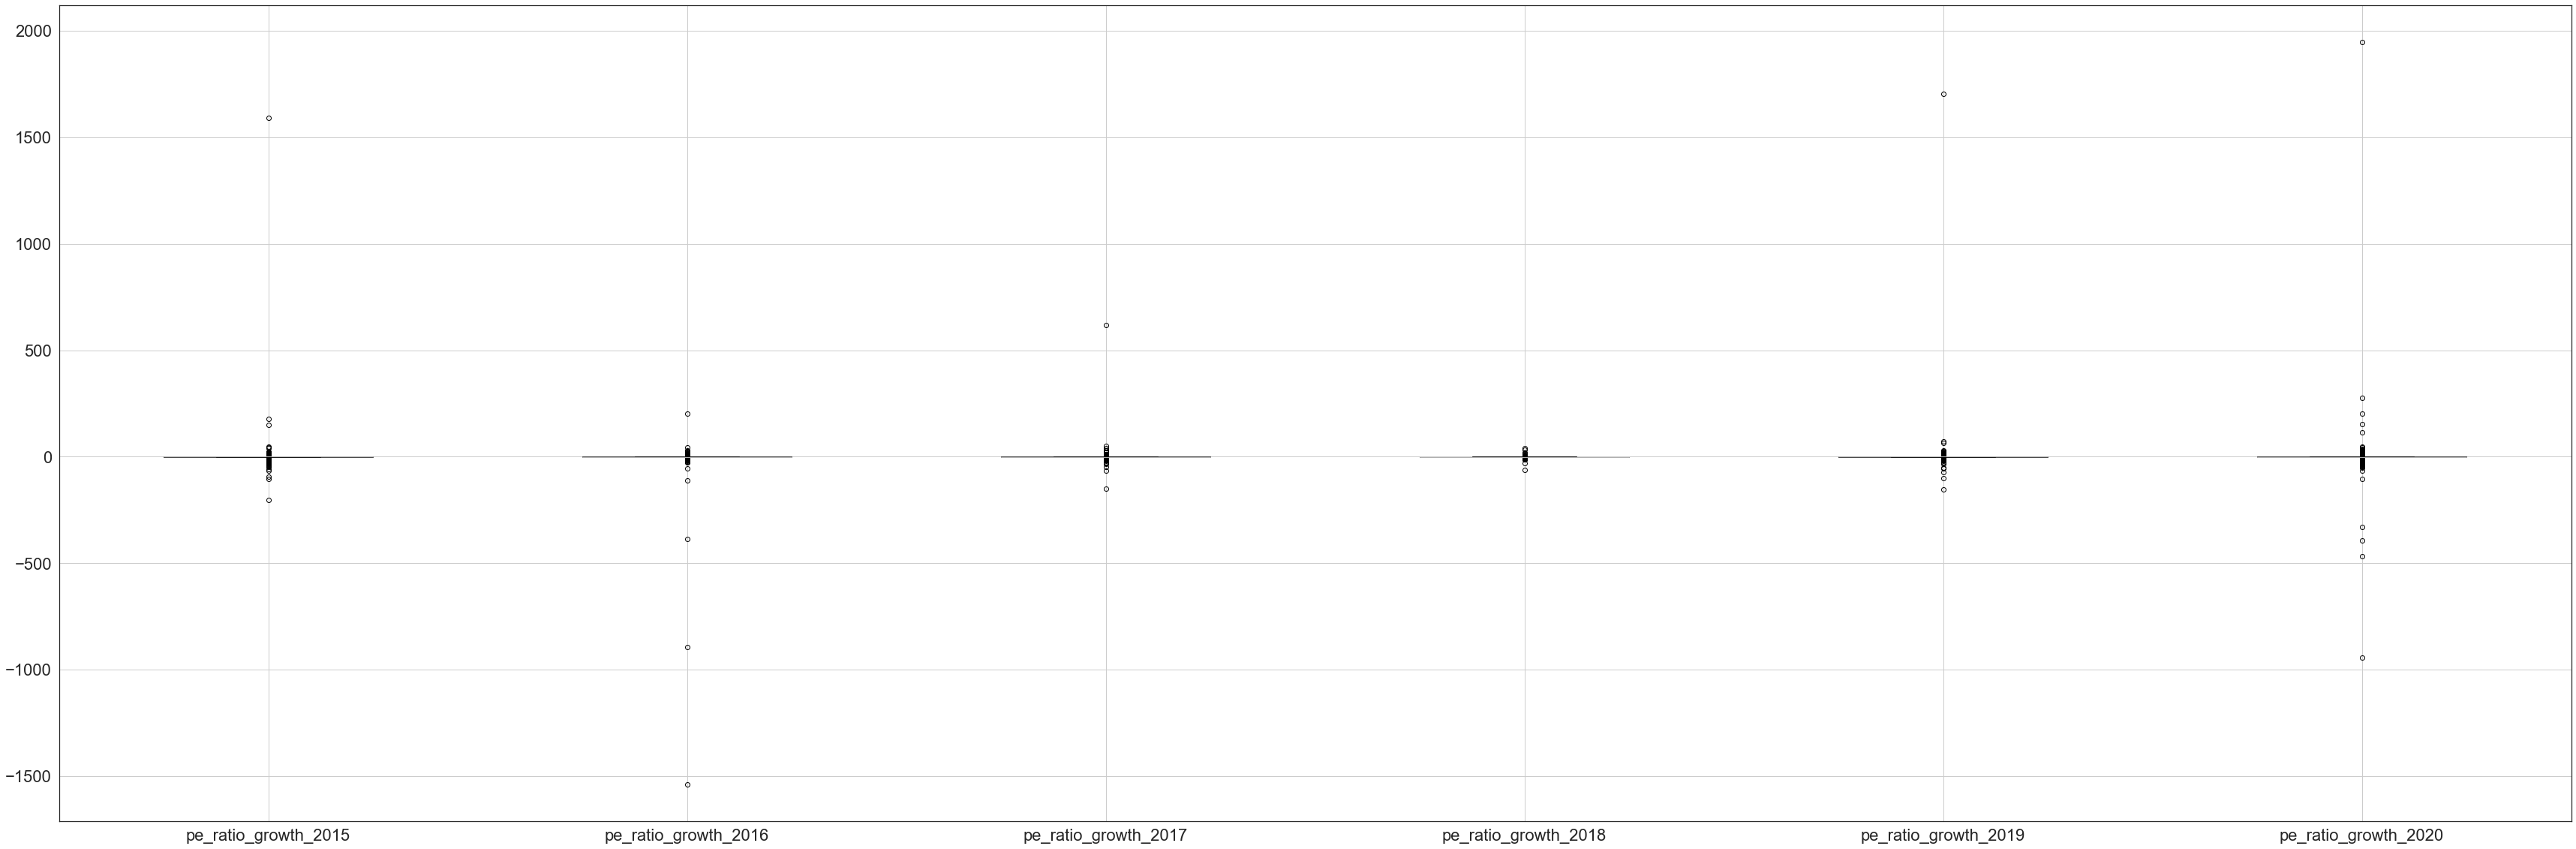

In [27]:
data_drop_outliers[["pe_ratio_growth_2015", "pe_ratio_growth_2016", "pe_ratio_growth_2017", "pe_ratio_growth_2018", "pe_ratio_growth_2019", "pe_ratio_growth_2020"]].boxplot()

From the boxplot we can clearly see that the most of the data is around -100 to 100. The distribution of the data mostly on -300 and 300. We can see there have some outliers, most of outiers are far away from the center of data.  Since the outlier will affect our result, we will drop the outliers. Since most data is between -300 and 300, we decide to filter the data outside this range.

The boxplot cannot be clearly show the relation ship between pe_ratio_growth and price_growth. We want to use the lmplot to show the corralation between those to variables after we drop the outliers.

In [28]:
for i in range(2015, 2021):
    data_drop_outliers = data_drop_outliers[(data_drop_outliers["pe_ratio_growth_{}".format(i)] < 300) & (data_drop_outliers["pe_ratio_growth_{}".format(i)] > -300)]

In [29]:
data_drop_outliers.head()

code  roe_2014  net_profit_to_total_revenue_2014  pe_ratio_2014  \
1  000096.XSHE    2.2570                            4.3263        33.5305   
4  600782.XSHG    5.1865                            1.3226        20.8759   
5  600781.XSHG    4.0889                            3.6644       128.4387   
8  600785.XSHG   11.8761                            2.3250        13.6710   
9  600784.XSHG    3.0142                            1.2086        68.1003   

   roe_2015  net_profit_to_total_revenue_2015  pe_ratio_2015  roe_2016  \
1    7.6137                           14.9687        51.0757   13.6838   
4    0.7503                            0.2146       303.2231    6.0313   
5    8.3005                            7.1234       182.3531    4.8816   
8    7.6500                            1.4593        70.7935    3.3362   
9   -4.5578                           -3.4780       387.2989    2.7422   

   net_profit_to_total_revenue_2016  pe_ratio_2016  ...  pe_ratio_growth_2017  \
1                           32.7956       188.9197  ...             -0.880119   
4                            1.6825        16.0105  ...             -0.182062   
5                            4.4859       133.9732  ...              9.201276   
8                            0.4967       117.3998  ...             -0.704160   
9                            0.4207      -861.9310  ...             -0.785723   

   roe_growth_2018  price_growth_2018  pe_ratio_growth_2018  roe_growth_2019  \
1        -0.311475          -0.298780              0.708123         0.084445   
4         0.287521          -0.215929             -0.781934        -0.540665   
5         0.126252          -0.445175             -0.993050        -0.535941   
8         0.219564          -0.220936             -0.286284         0.213160   
9        -1.475243          -0.058271             -0.799465        -0.800065   

   price_growth_2019  pe_ratio_growth_2019  roe_growth_2020  \
1           0.234783              0.325030        -0.026247   
4           0.049661              0.244283        -0.288198   
5          -0.540711             -0.449973        -4.205646   
8          -0.081734             -0.047893        -0.774497   
9           0.037924             -5.141541        11.538156   

   price_growth_2020  pe_ratio_growth_2020  
1          -0.148768             -0.288090  
4          -0.062366              0.551994  
5          -0.385542             34.240688  
8          -0.146325              1.657498  
9           0.080769             -0.854394  

[5 rows x 47 columns]

We want to plot the relationship between pe_ratio_growth and the price growth using line plot. By observing the estimated line, we could tell their relationship based on the gradient.

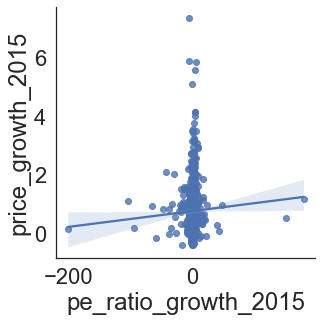

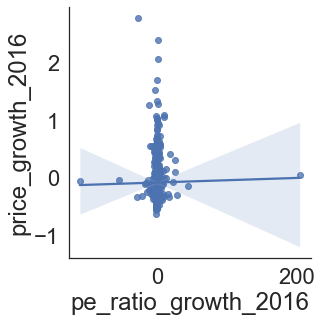

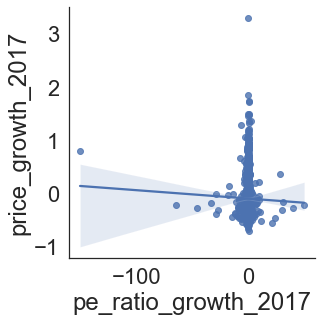

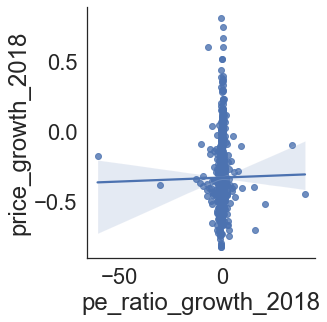

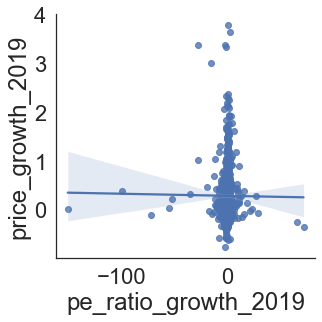

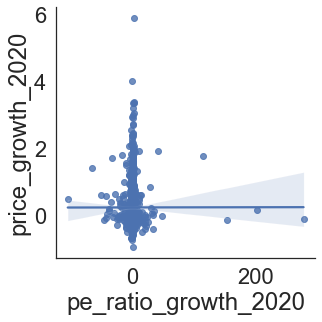

In [30]:
sns.lmplot(x="pe_ratio_growth_2015", y="price_growth_2015", data=data_drop_outliers)
sns.lmplot(x="pe_ratio_growth_2016", y="price_growth_2016", data=data_drop_outliers)
sns.lmplot(x="pe_ratio_growth_2017", y="price_growth_2017", data=data_drop_outliers)
sns.lmplot(x="pe_ratio_growth_2018", y="price_growth_2018", data=data_drop_outliers)
sns.lmplot(x="pe_ratio_growth_2019", y="price_growth_2019", data=data_drop_outliers)
sns.lmplot(x="pe_ratio_growth_2020", y="price_growth_2020", data=data_drop_outliers)

From the lmplot, we can directly see that all years' pe_ratio_growth is around the 0. Although most of the pe_ratio_growth is around 0, but it has the different value of price_growth. The trend of each year is similar but still have a little difference. The relationship between pe_ratio_growth and price_growth in 2015, 2016, 2018, and 2020 is positive. With the pe_ratio_growth increse, the price_groth will also increse. Otherwise, the relationship between pe_ratio_growth and price_growth in 2017 and 2019 is negative. With the pe_ratio_growth increse, the price_groth will also decrese.

### net_profit_to_total_revenue vs price_growth

We plot the box plot for the net_profit_to_total_revenue throughout out the years to find out range for filtering the outlier.

<AxesSubplot:>

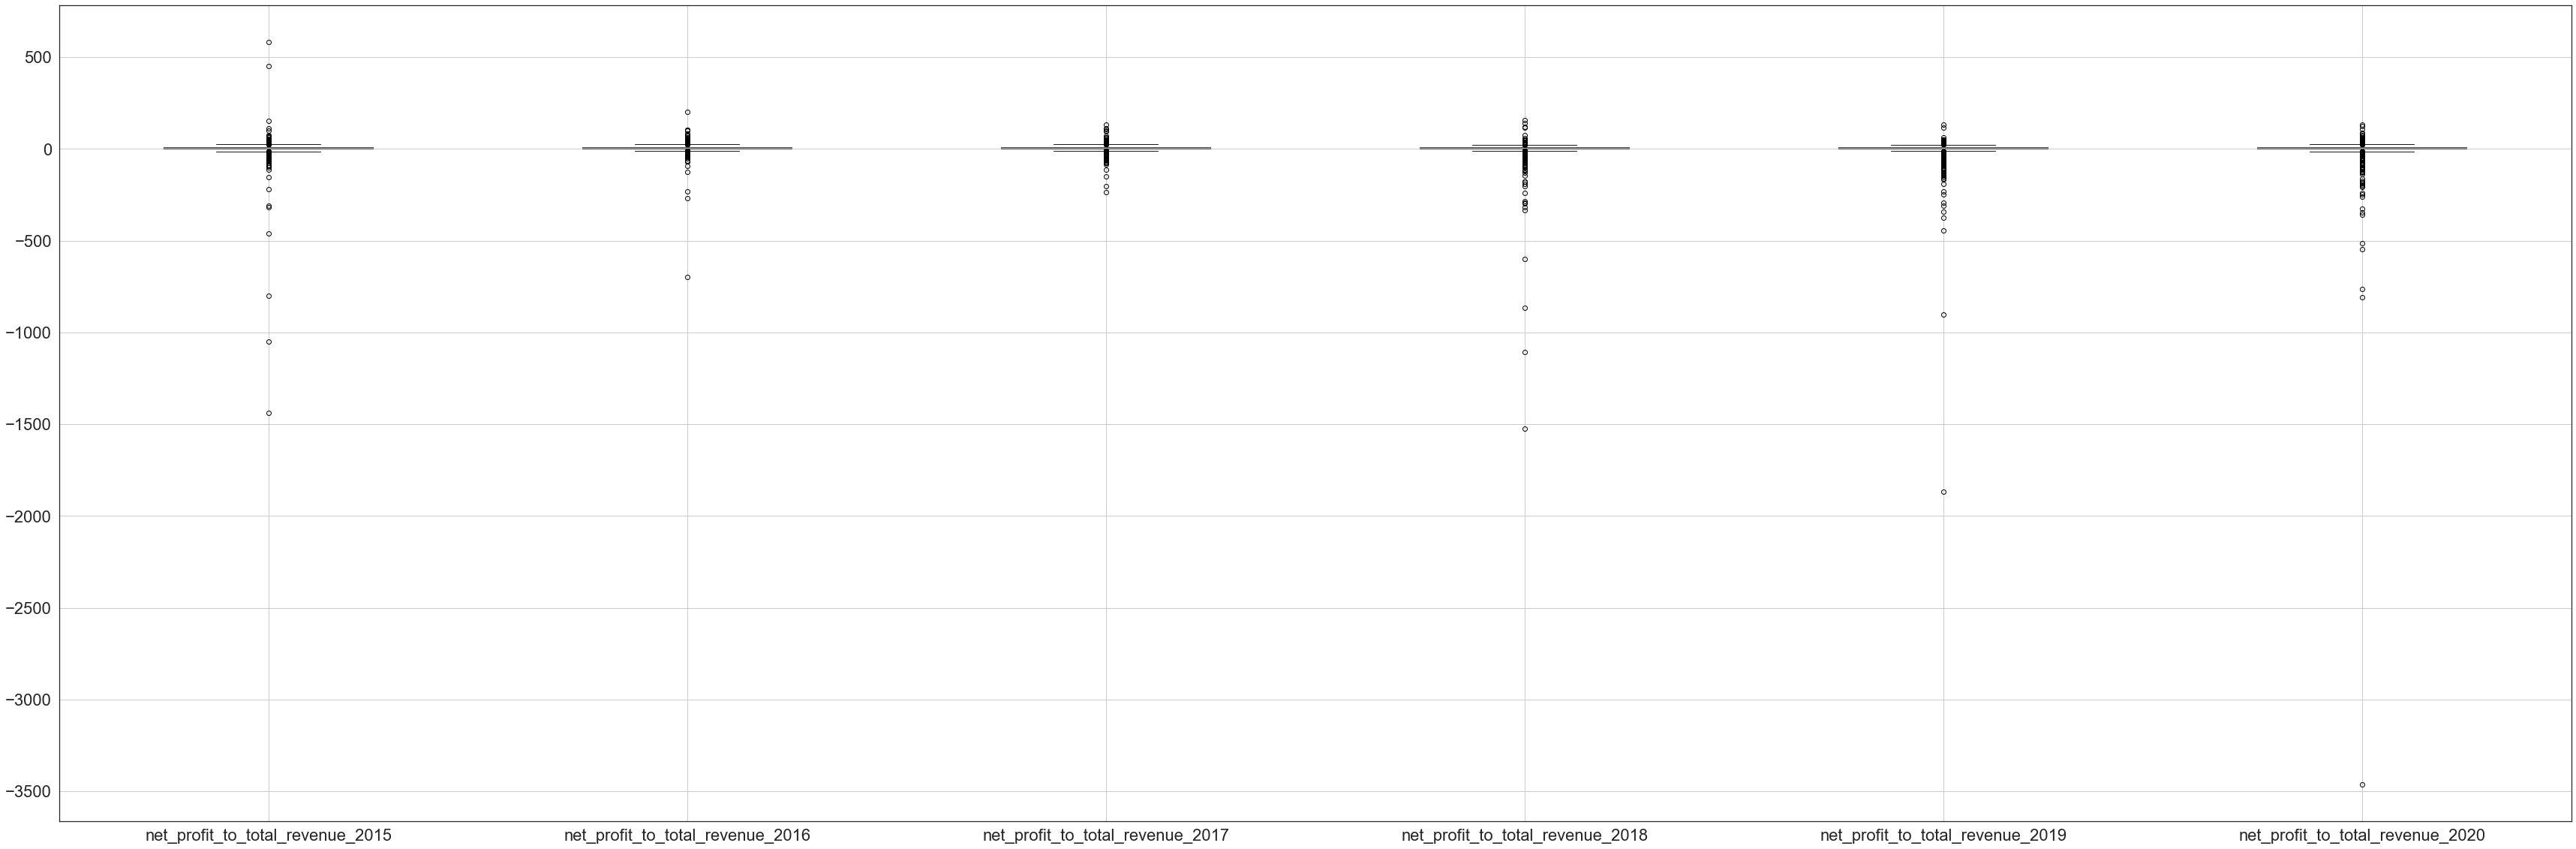

In [31]:
data_drop_outliers[["net_profit_to_total_revenue_2015", "net_profit_to_total_revenue_2016", "net_profit_to_total_revenue_2017", "net_profit_to_total_revenue_2018", "net_profit_to_total_revenue_2019", "net_profit_to_total_revenue_2020"]].boxplot()

The boxplot clearly shows us the range of all data, which is useful to identify the outlier. According to the boxplot, most of the stocks see the net_profit_to_total_revenue growth or decline no more than 10%. The distribution mostly centers at zero. The extreme values of the net_profit_to_total_revenue are up to -3500 to 550. Based on the plot, we decide to filter the range from 300 to -300. In this case, we can remove almost all values of the extreme data.  The shape of the distribution is all concentrated at 0 and  hard to see in this graph due to outliers, so we will explore the shape after excluding the outliers in scatter plot for better visualization.

After this, we can filter the net_profit_to_total_revenue data using the range selected [300, -300].

In [32]:
for i in range(2015, 2021):
    data_drop_outliers = data_drop_outliers[(data_drop_outliers["net_profit_to_total_revenue_{}".format(i)] < 300) & (data_drop_outliers["net_profit_to_total_revenue_{}".format(i)] > -500)]

Check the data after we drop the outliers

In [33]:
data_drop_outliers.head()

code  roe_2014  net_profit_to_total_revenue_2014  pe_ratio_2014  \
1  000096.XSHE    2.2570                            4.3263        33.5305   
4  600782.XSHG    5.1865                            1.3226        20.8759   
5  600781.XSHG    4.0889                            3.6644       128.4387   
8  600785.XSHG   11.8761                            2.3250        13.6710   
9  600784.XSHG    3.0142                            1.2086        68.1003   

   roe_2015  net_profit_to_total_revenue_2015  pe_ratio_2015  roe_2016  \
1    7.6137                           14.9687        51.0757   13.6838   
4    0.7503                            0.2146       303.2231    6.0313   
5    8.3005                            7.1234       182.3531    4.8816   
8    7.6500                            1.4593        70.7935    3.3362   
9   -4.5578                           -3.4780       387.2989    2.7422   

   net_profit_to_total_revenue_2016  pe_ratio_2016  ...  pe_ratio_growth_2017  \
1                           32.7956       188.9197  ...             -0.880119   
4                            1.6825        16.0105  ...             -0.182062   
5                            4.4859       133.9732  ...              9.201276   
8                            0.4967       117.3998  ...             -0.704160   
9                            0.4207      -861.9310  ...             -0.785723   

   roe_growth_2018  price_growth_2018  pe_ratio_growth_2018  roe_growth_2019  \
1        -0.311475          -0.298780              0.708123         0.084445   
4         0.287521          -0.215929             -0.781934        -0.540665   
5         0.126252          -0.445175             -0.993050        -0.535941   
8         0.219564          -0.220936             -0.286284         0.213160   
9        -1.475243          -0.058271             -0.799465        -0.800065   

   price_growth_2019  pe_ratio_growth_2019  roe_growth_2020  \
1           0.234783              0.325030        -0.026247   
4           0.049661              0.244283        -0.288198   
5          -0.540711             -0.449973        -4.205646   
8          -0.081734             -0.047893        -0.774497   
9           0.037924             -5.141541        11.538156   

   price_growth_2020  pe_ratio_growth_2020  
1          -0.148768             -0.288090  
4          -0.062366              0.551994  
5          -0.385542             34.240688  
8          -0.146325              1.657498  
9           0.080769             -0.854394  

[5 rows x 47 columns]

Note that most of the outliers are companies that has been barely keeping up with the market and losing enormous revenue, and only a few of them generate abnormal profit. These outliers will not be helpful in finding out the general trend between net_profit_to_total_revenue and the changes in stock price that we are trying to seek, since most companies merely see small growth or decline in a year.

We want to plot the relationship between net_profit_to_total_revenue and the price growth using line plot. By observing the estimated line, we could tell their relationship based on the gradient.

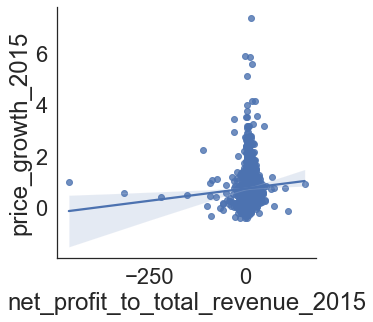

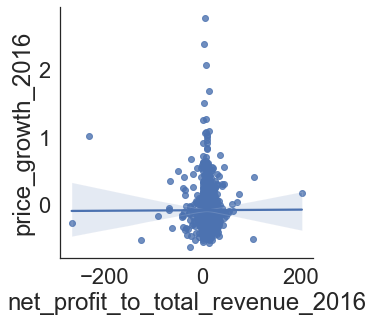

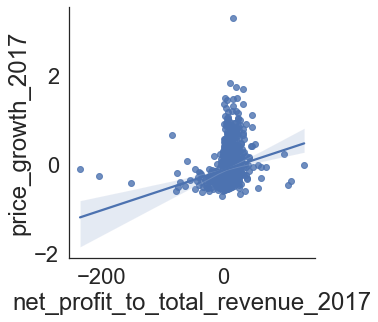

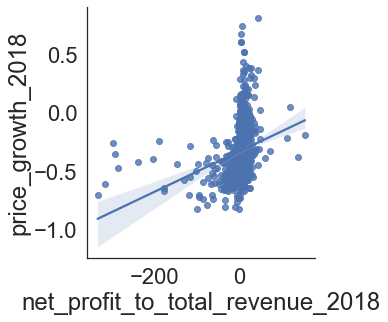

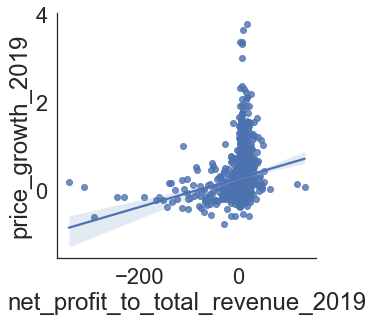

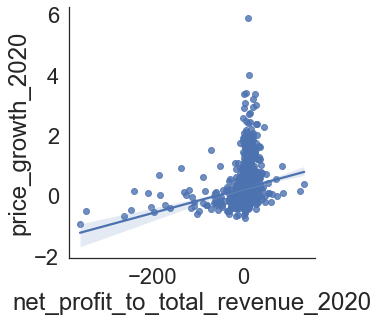

In [34]:
# plot the net_profit_to_total_revenue against the price growth
sns.lmplot(x="net_profit_to_total_revenue_2015", y="price_growth_2015", data=data_drop_outliers)
sns.lmplot(x="net_profit_to_total_revenue_2016", y="price_growth_2016", data=data_drop_outliers)
sns.lmplot(x="net_profit_to_total_revenue_2017", y="price_growth_2017", data=data_drop_outliers)
sns.lmplot(x="net_profit_to_total_revenue_2018", y="price_growth_2018", data=data_drop_outliers)
sns.lmplot(x="net_profit_to_total_revenue_2019", y="price_growth_2019", data=data_drop_outliers)
sns.lmplot(x="net_profit_to_total_revenue_2020", y="price_growth_2020", data=data_drop_outliers)

From the implot, we can see overall positive relationship between net_profit_to_total_revenue and the changes in stock price. Most of the stocks have net_profit_to_total_revenue centers around zero, which means that they are barely earning any economic profit. Only the data from 2016 shows a flat line that means net_profit_to_total_revenue does not change in stock price. This special case could be contributed to the 2015–2016 stock market selloff. By early 2016, global stock markets were falling hard. Negative economic reports from China caused panic selling. Interest rates fell sharply, and there were widespread warnings of deflation and depression. This economic recession has global impact, so we could ignore this when we summarize the general trend. For firms that do have net_profit_to_total_revenue greater than 0, no matter the degree, these data manage to move up the gradient and show an overall positive relationship between net_profit_to_total_revenue and the changes in stock price. The blur shadow area is the marginal of error. Within that area, we can still witness a positive correlation. This trend is understandable, since the higher ratio means that the firms that make higher profit with less revenue and have higher profit margin will have higher stock price on that year. The investor believes that firms with higher profit marginal have better potential, and therefore more people buy their stock. Consequently, the stock prices raise.

### Price_growth v.s. roe

<AxesSubplot:>

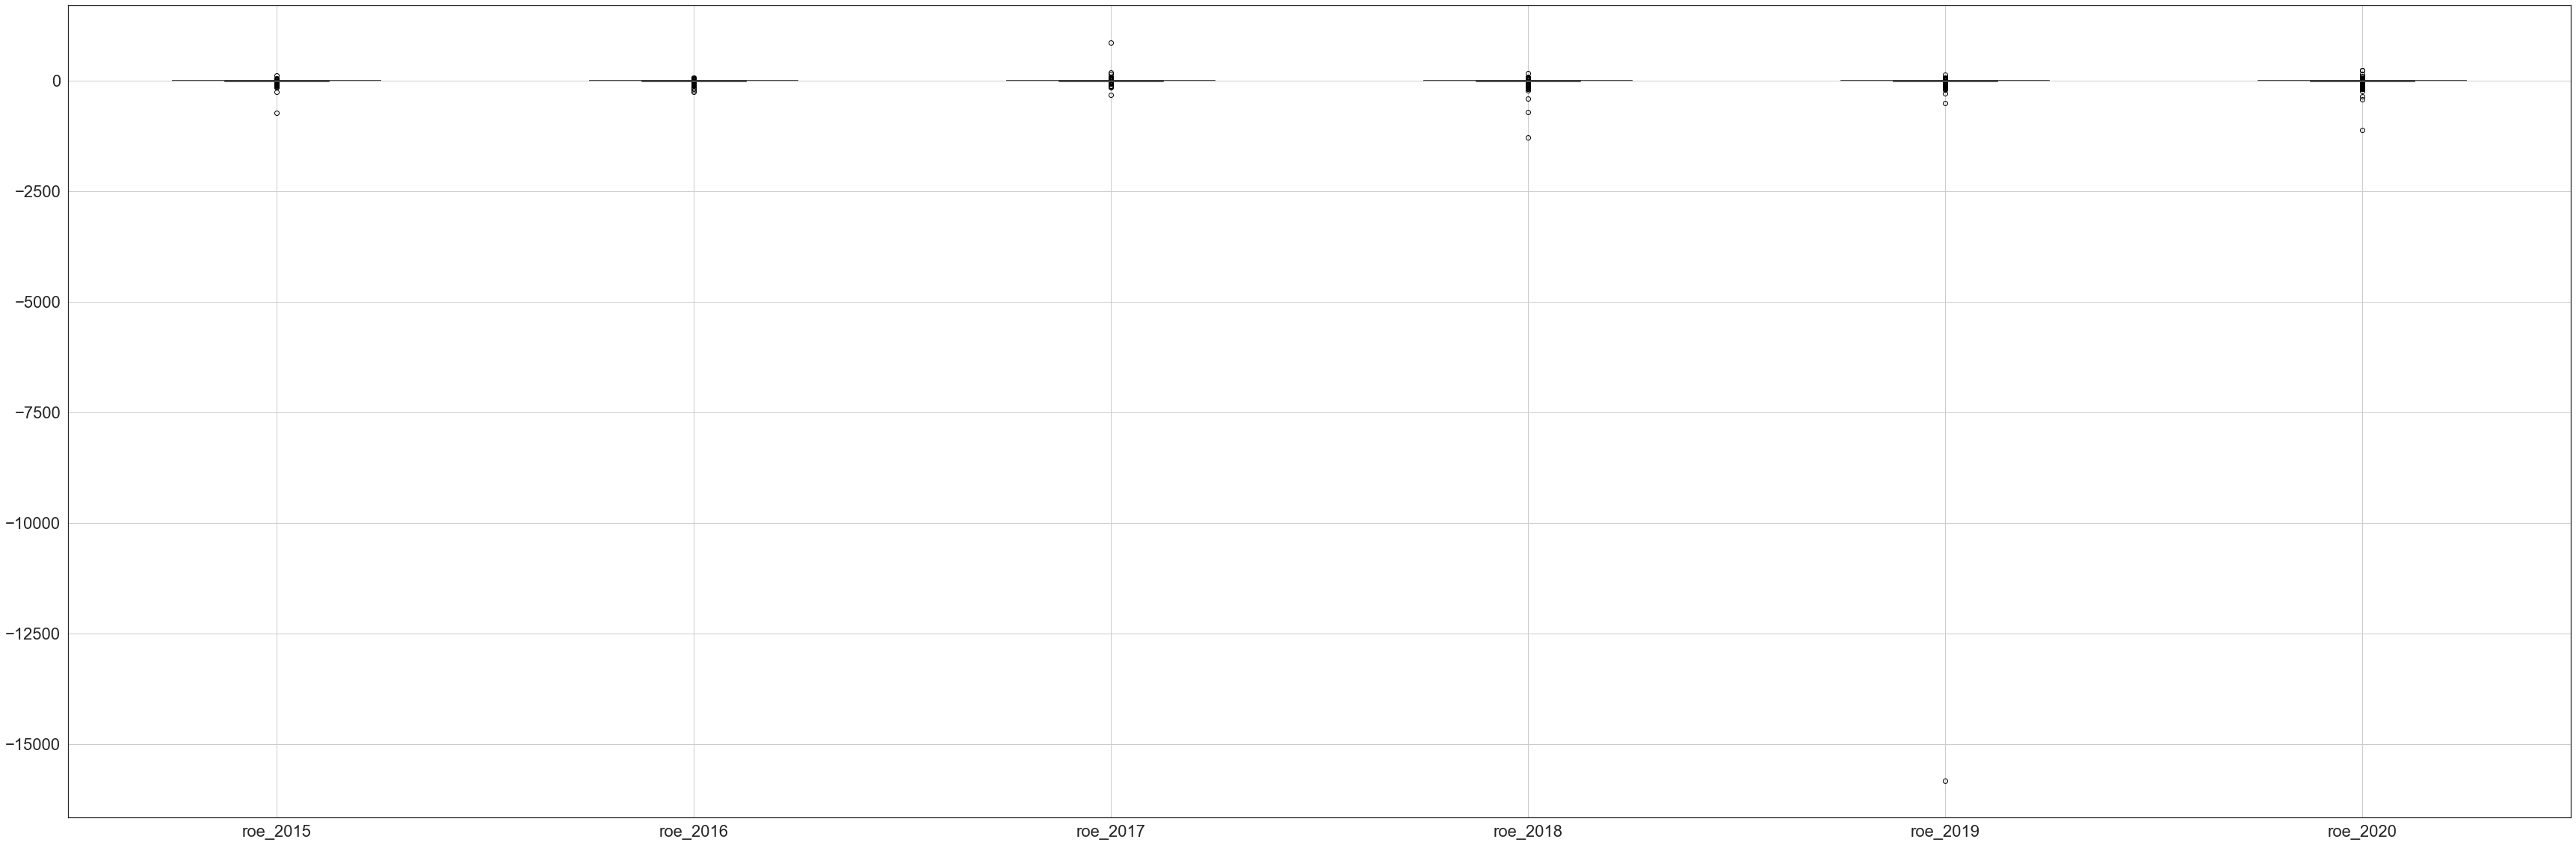

In [35]:
data[["roe_2015", "roe_2016", "roe_2017", "roe_2018", "roe_2019", "roe_2020"]].boxplot()

In [36]:
for i in range(2015, 2021):
    data_drop_outliers = data_drop_outliers[(data_drop_outliers["roe_{}".format(i)] < 300) & (data_drop_outliers["roe_{}".format(i)] > -500)]

<AxesSubplot:>

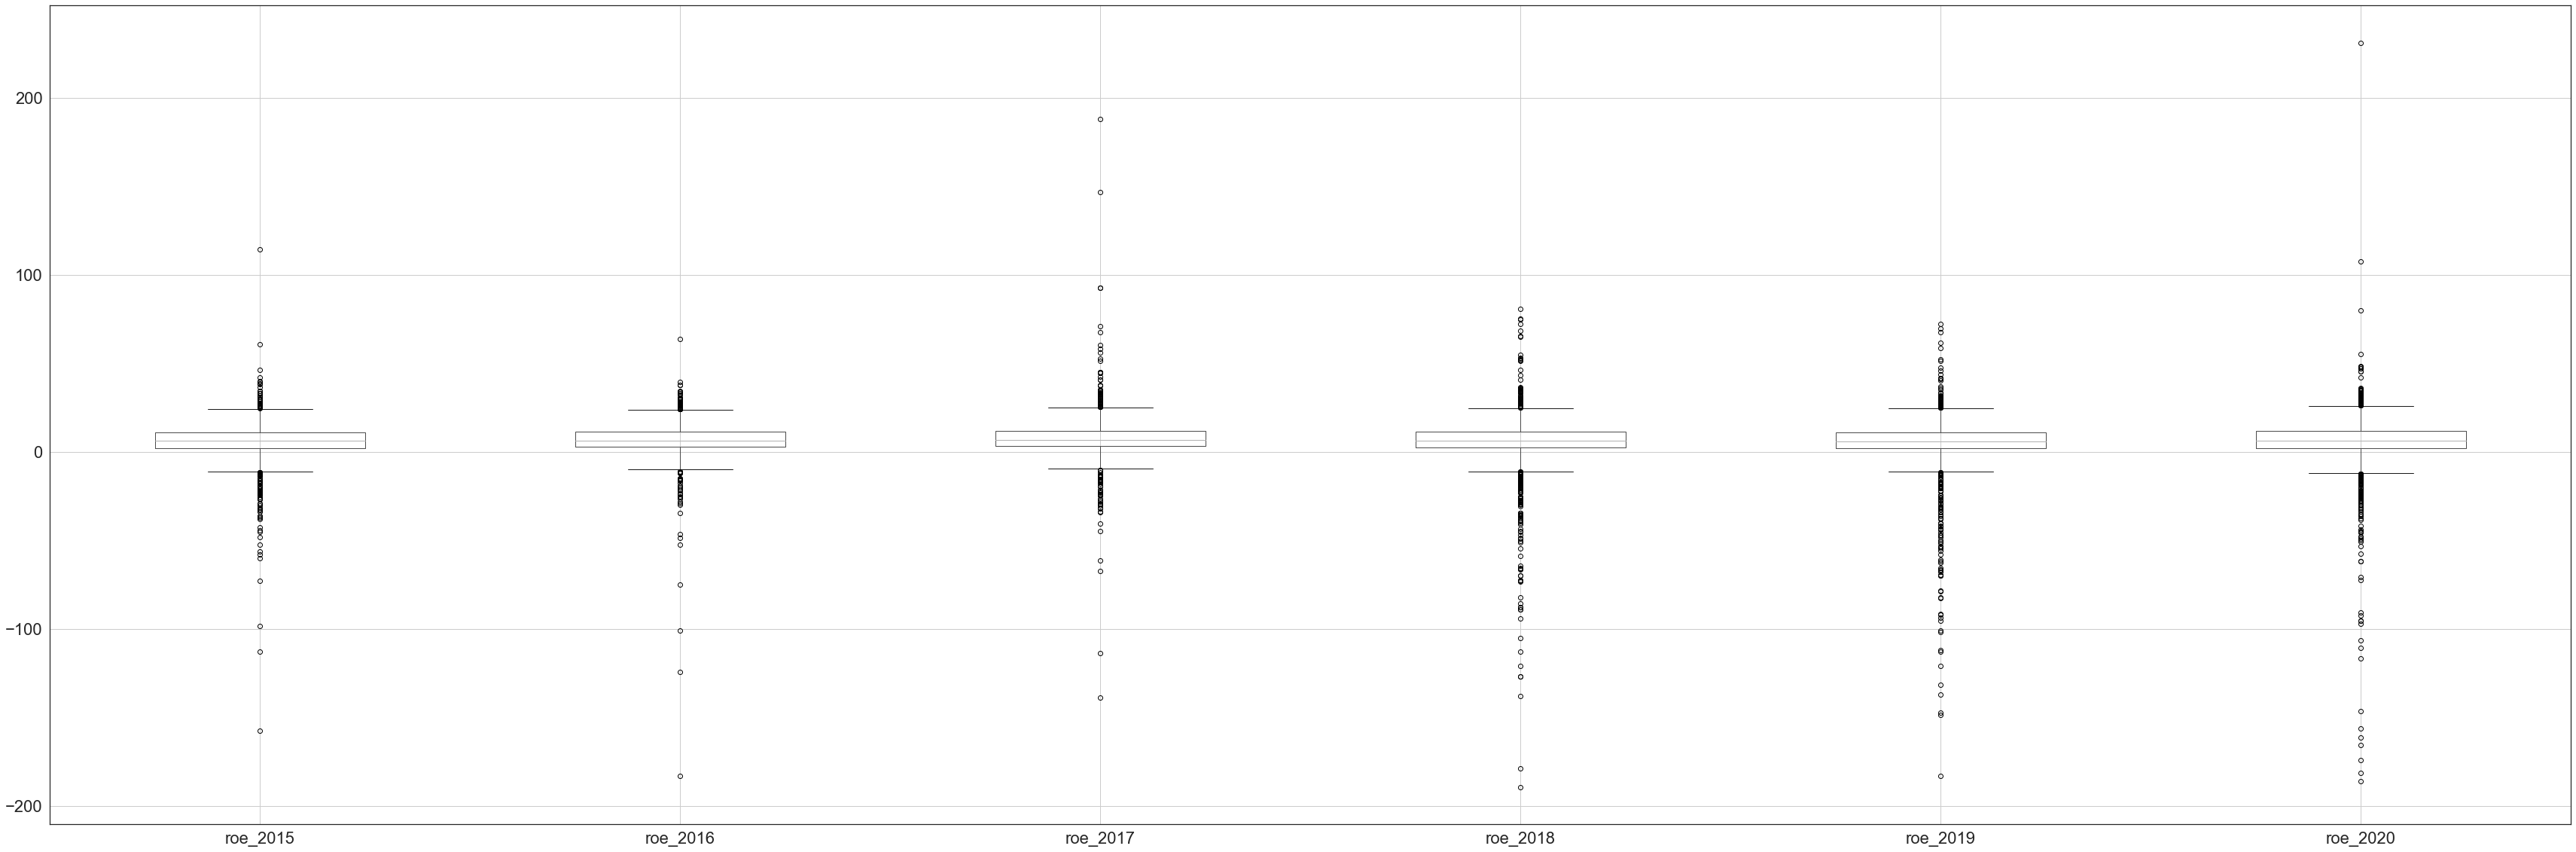

In [37]:
data_drop_outliers[["roe_2015", "roe_2016", "roe_2017", "roe_2018", "roe_2019", "roe_2020"]].boxplot()

This boxplot shows us the outlier data for the roe distribution. According to the boxplot, most of the stocks have a roe value between -100 to 50. The distribution mostly centers at zero. Thus we eliminate the outliers that have roe more than 300 and outliers that have roe less than -500. The shape of the distribution is hard to see in this graph due to outliers, so we will explore the shape after excluding the outliers in the scatter plot for better visualization. After we excluded the outlier, we could see the median roe value for each year is a little bit above 0, around 5, with 25% quartile of around 7%, 75% quartile of around 1%.

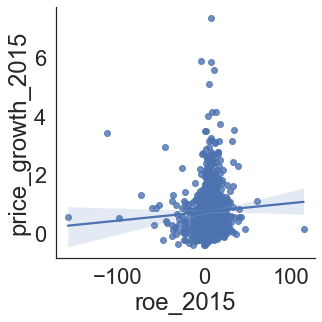

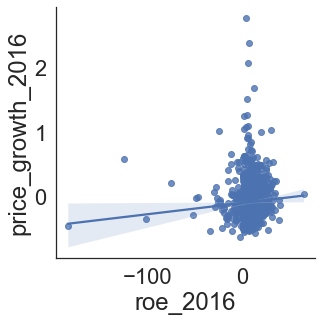

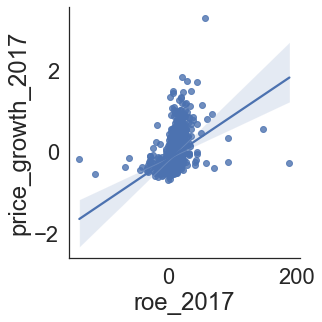

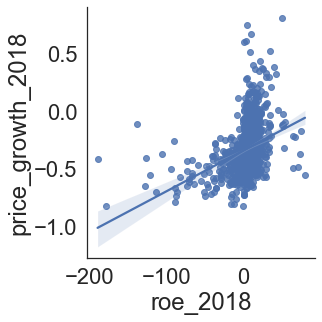

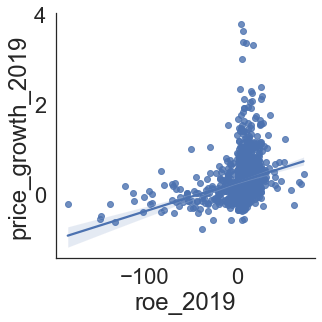

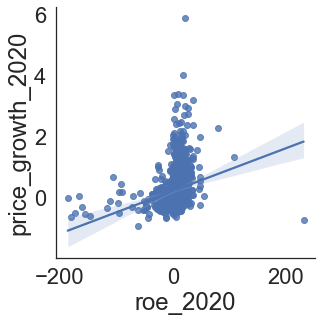

In [38]:
sns.lmplot(x="roe_2015", y="price_growth_2015", data=data_drop_outliers)
sns.lmplot(x="roe_2016", y="price_growth_2016", data=data_drop_outliers)
sns.lmplot(x="roe_2017", y="price_growth_2017", data=data_drop_outliers)
sns.lmplot(x="roe_2018", y="price_growth_2018", data=data_drop_outliers)
sns.lmplot(x="roe_2019", y="price_growth_2019", data=data_drop_outliers)
sns.lmplot(x="roe_2020", y="price_growth_2020", data=data_drop_outliers)

The trend is very similar across the year. On average, we see an upward trend with higher roe relate to higher price growth for each year. Most of the stocks have roe growth centers around zero. However, their price growth has a larger variance. We can often see stocks that have around zero roe but with high price growth. 

### Visualize the Correlation using Heatmap

We want to use the heatmap to see is there any variables which has higher relationship with the price_growth.

<AxesSubplot:>

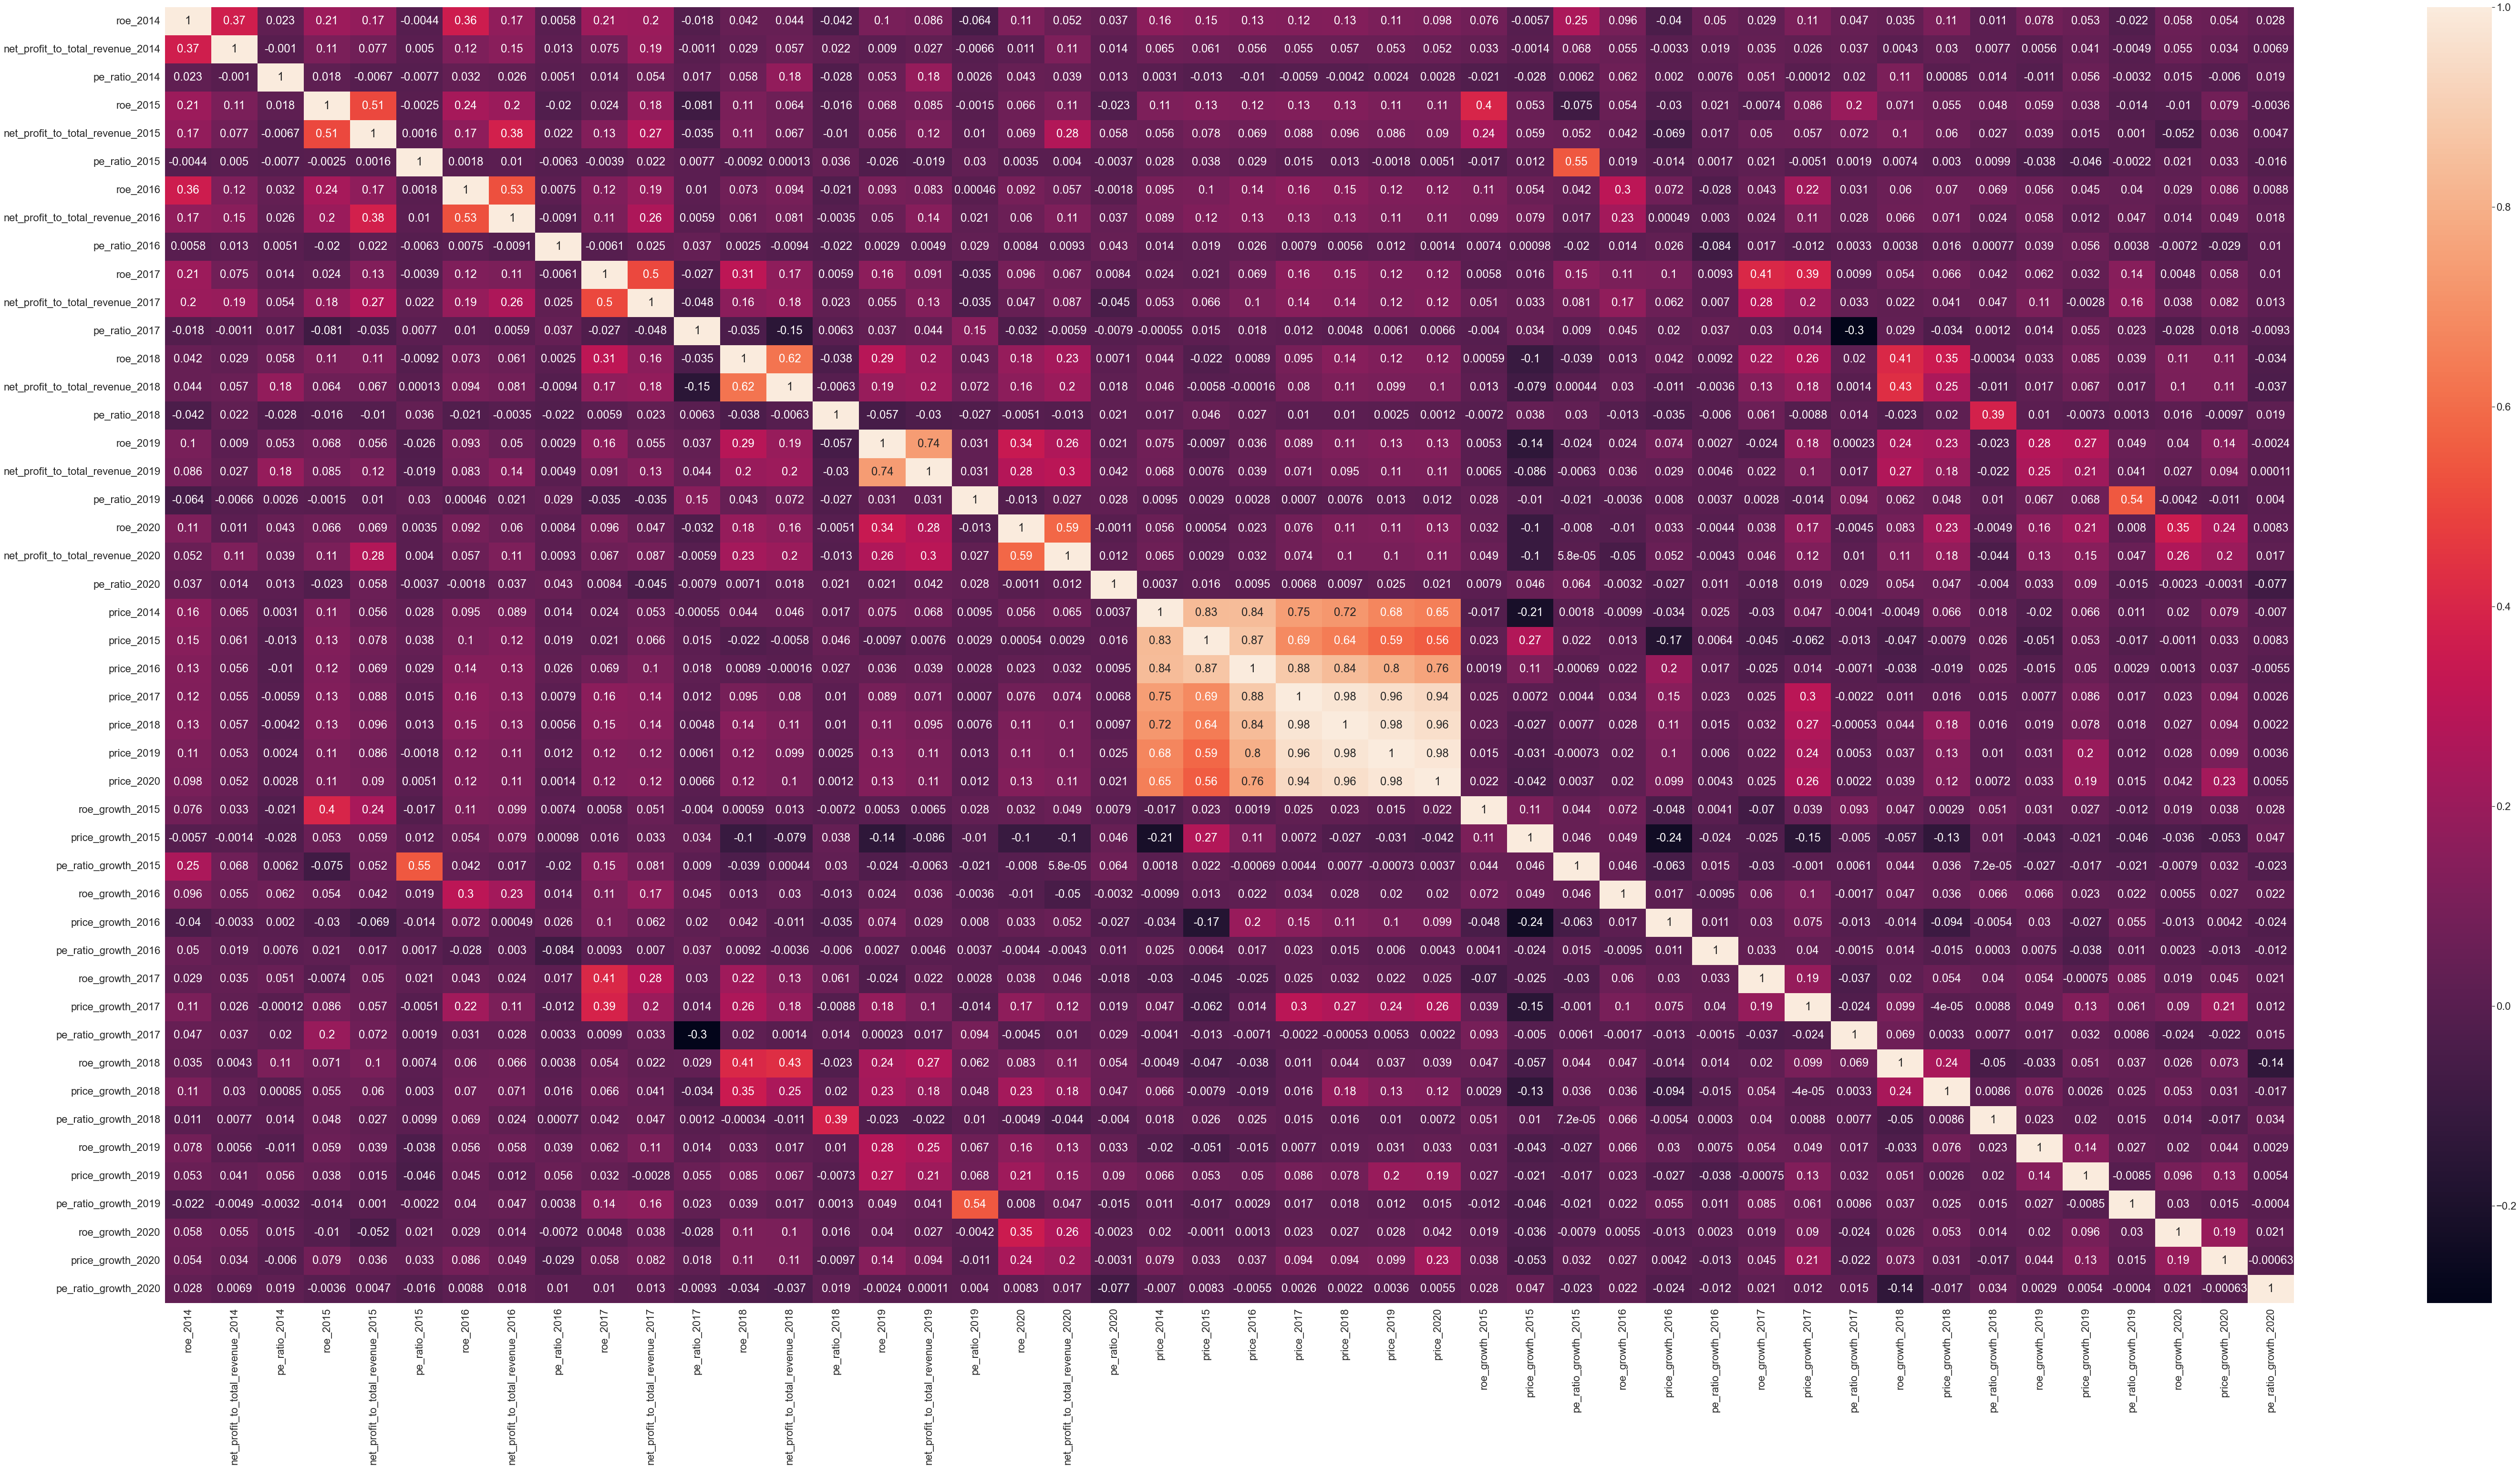

In [39]:
plt.subplots(figsize=(100,50))
sns.heatmap(data_drop_outliers.corr(), annot=True)

The lighter color indicates the stronger positive relationship. From the heatmap, we can see that the correlation coefficients of price_growth and other variables are not high, that means the price_growth do not have strong relation with the other variable. This also shows that the relationship between price_growth and other variable is little.

### OLS

We make the function to see whether net_profit_to_total_revenue, roe_growth, and pe_ratio_growth will lead the corresponding changes in the stock prices. The OLS result summary will generate the information will tell us the whether we can reject the null hypothesis and there is a causal relationship between our variables.

In [40]:
for i in range(2015, 2021):
    df = data_drop_outliers[['net_profit_to_total_revenue_{}'.format(i), 'roe_growth_{}'.format(i), 'pe_ratio_growth_{}'.format(i),
                             'price_growth_{}'.format(i), "roe_{}".format(i)
                            ]]
    df.columns = ['net_profit_to_total_revenue', 'roe_growth', 'pe_ratio_growth', 'price_growth', "roe"]
    outcome,predictors = patsy.dmatrices('price_growth~net_profit_to_total_revenue+roe_growth+pe_ratio_growth+roe', df)
    mod_log = sm.OLS(outcome, predictors)
    res_log = mod_log.fit()
    print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:           price_growth   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     5.510
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           0.000211
Time:                        15:21:47   Log-Likelihood:                -1561.9
No. Observations:                1455   AIC:                             3134.
Df Residuals:                    1450   BIC:                             3160.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

### Result

Across the yers, we see pe_ratio growth and net profit to total revenue always having p values. This suggests that pe ratio growth and net profit to total revenue have little correlation with price growth. For roe growth and roe, both do not show statistical significance in some years. Even in the years that they do have statistical significance, the estimated coefficient is very small, with the largest being 0.0209, which means that at best, with one unit increase in roe growth or net profit to total revenue, we will see at most 0.0209 unit increase in price growth. However with r-squared and adjusted R-squared values being so close to zero for all the years, we can conclude that these variables only explains a tiny portion of the variance in price growth and provides only negligible benefits in real world applications. Thus, we see no strong or useful relationship between price growth vs. roe growth, pe ratio growth, net profit to total revenue, and roe.

## Further Analysis

Since many of the data points have a wide range of x values, we want to replot the relationship above but with log of the x values and see if there are any interesting relationship.

In [41]:
cols_to_be_logged = data_drop_outliers.columns.tolist()[1:]

In [42]:
for i in cols_to_be_logged:
    data_drop_outliers[i + "_logged"] = np.log(data_drop_outliers[i])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Price Growth vs. log(roe_growth)

<AxesSubplot:>

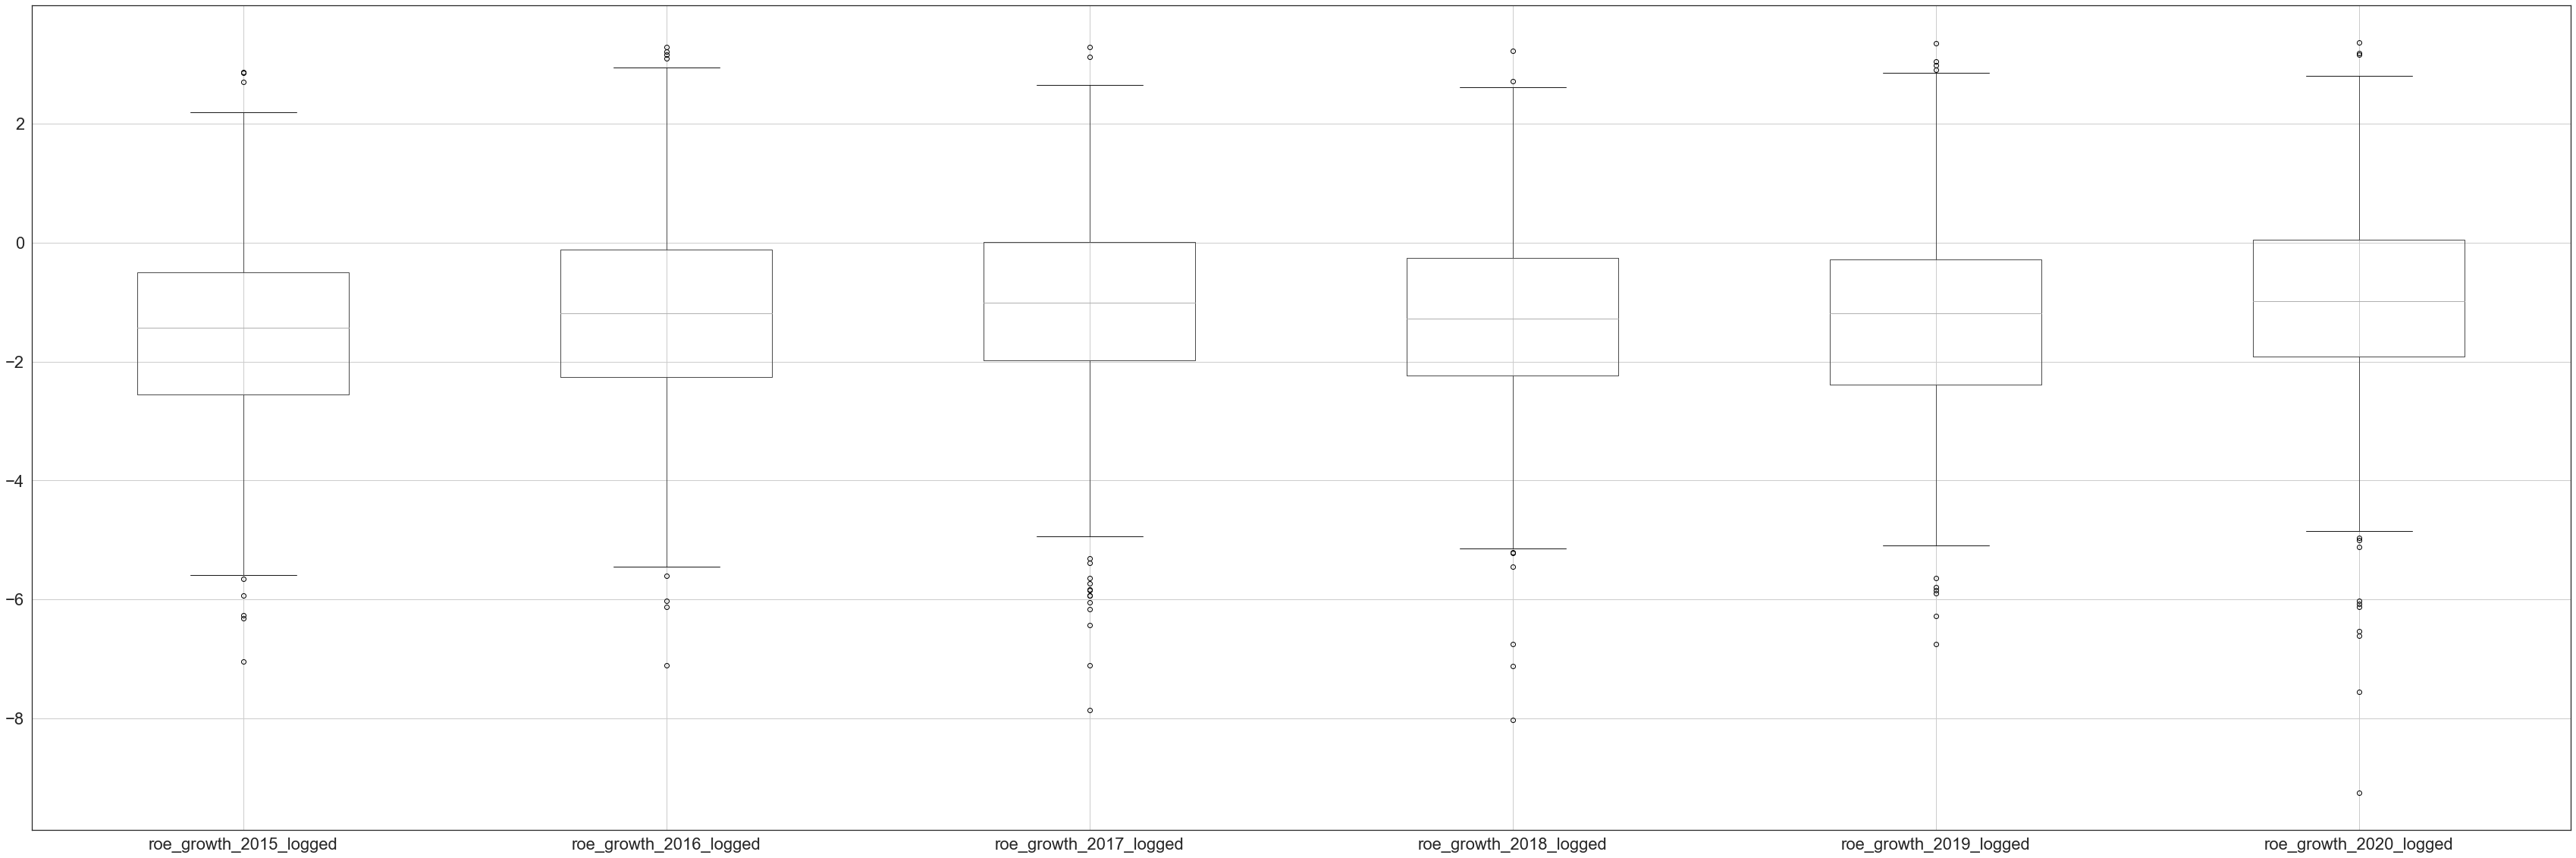

In [43]:
data_drop_outliers[["roe_growth_2015_logged", "roe_growth_2016_logged", "roe_growth_2017_logged", "roe_growth_2018_logged", "roe_growth_2019_logged", "roe_growth_2020_logged"]].boxplot()

For roe growth logged, most of the yars have means around -1. The data generally ranges from 2 to -6 with points outside of the range being outliers. We can see that the range from 0 to -2 covers most of the years' middle 50 percent values. Based on this boxplot, we see not too many outliers comparing to graphs in the previous sections. Thus we decided not to drop any more points

Now we redraw the line plot to see if there are any relationship between roe growth logged and price growth.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


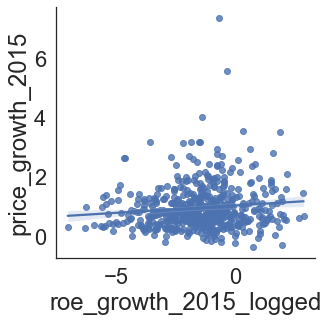

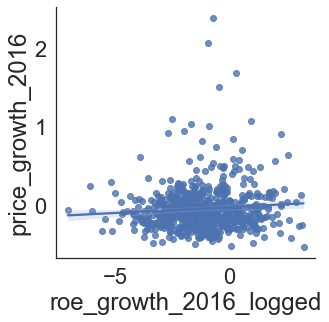

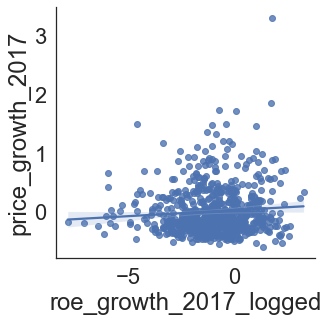

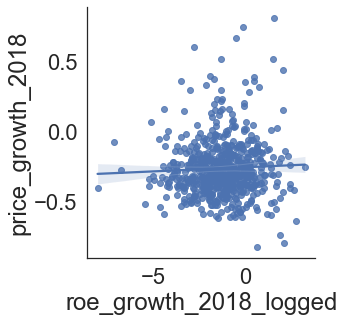

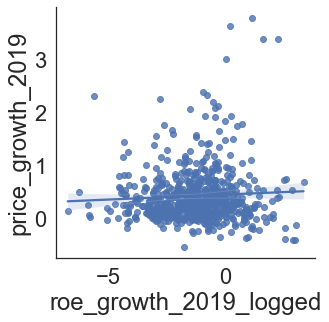

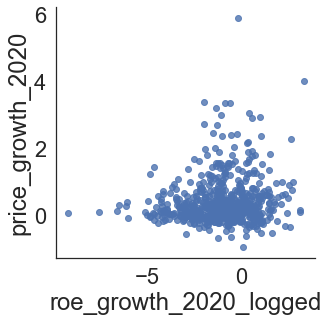

In [44]:
sns.lmplot(x="roe_growth_2015_logged", y="price_growth_2015", data=data_drop_outliers)
sns.lmplot(x="roe_growth_2016_logged", y="price_growth_2016", data=data_drop_outliers)
sns.lmplot(x="roe_growth_2017_logged", y="price_growth_2017", data=data_drop_outliers)
sns.lmplot(x="roe_growth_2018_logged", y="price_growth_2018", data=data_drop_outliers)
sns.lmplot(x="roe_growth_2019_logged", y="price_growth_2019", data=data_drop_outliers)
sns.lmplot(x="roe_growth_2020_logged", y="price_growth_2020", data=data_drop_outliers)

The relationship is now much clearer with the data points more clustered together around the central line than before. Most of the outliers are easy to spot in the graph. Many of them are companies with high price growth but with low roe growth logged. These are the companies that most likely have a high roe in the previous year and keeping that high roe is already a feat, which will definitely attract more investors and increase stock price.

### Price Growth vs. log(pe_ratio_growth)

We plot the box plot for the price_growth and log(pe_ratio_growth) to find there has any outliers.

<AxesSubplot:>

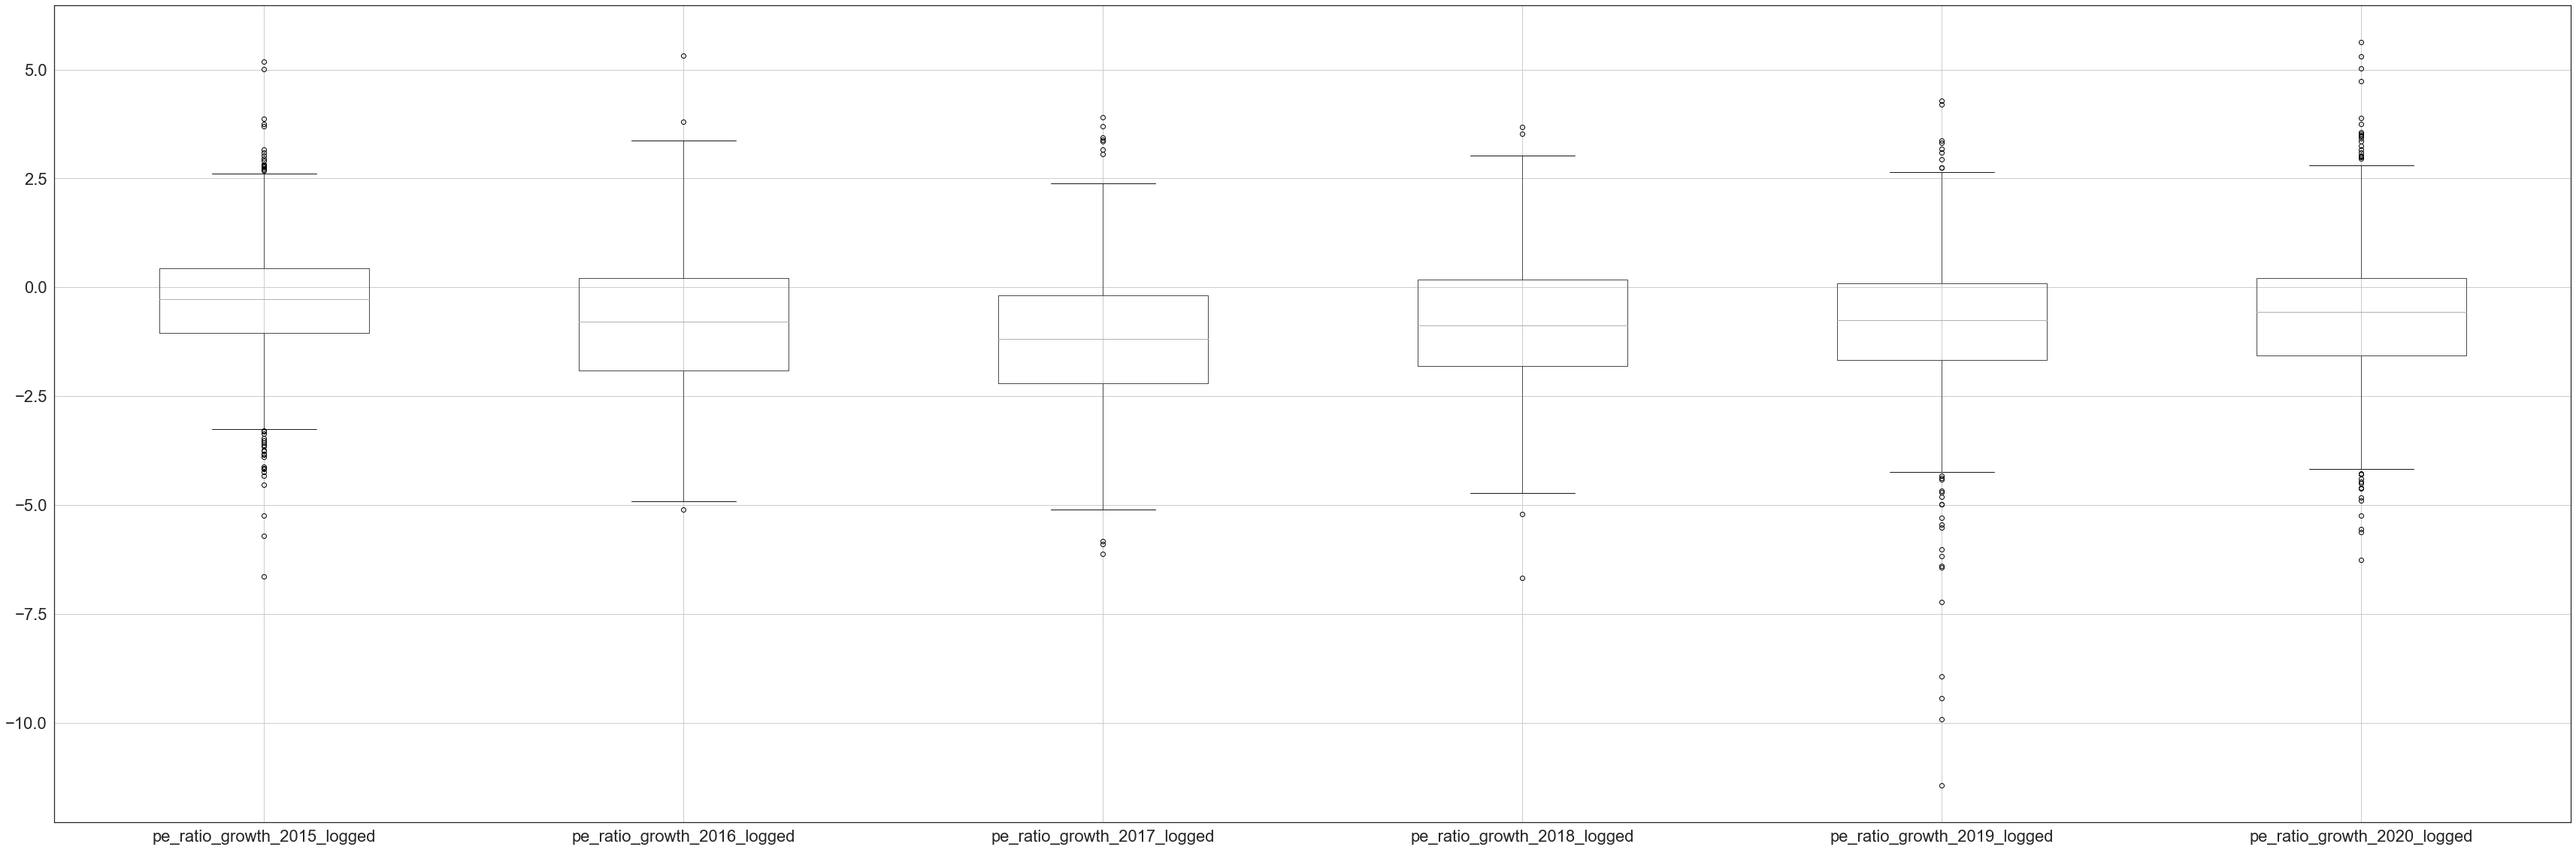

In [45]:
data_drop_outliers[["pe_ratio_growth_2015_logged", "pe_ratio_growth_2016_logged", "pe_ratio_growth_2017_logged", "pe_ratio_growth_2018_logged", "pe_ratio_growth_2019_logged", "pe_ratio_growth_2020_logged"]].boxplot()

After log the pe_ratio_growth, we can see that the range of each year's pe_ratio growth are not very big. The distribution of the data are more concentrated on the -5 to 5. There still exits some outliers for each year's data, but those are not extramly far from the center of data, we don't remove those outliers.

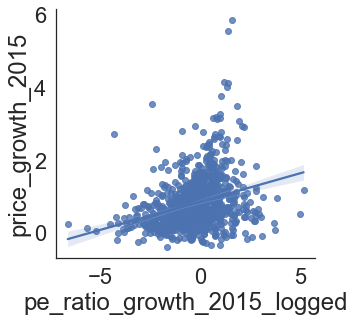

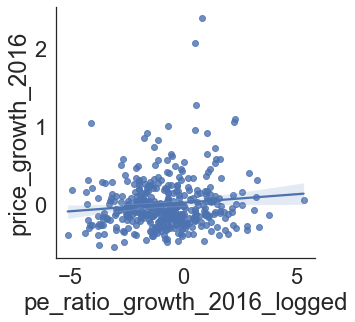

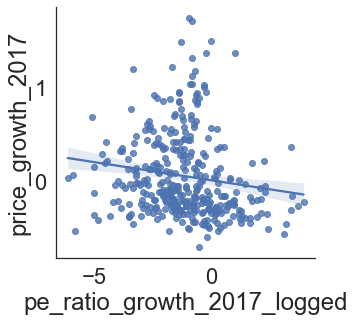

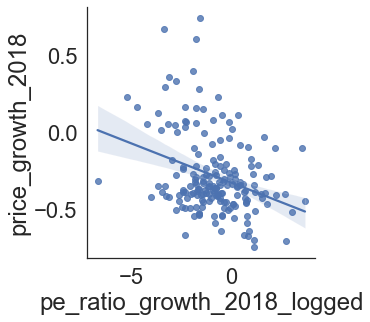

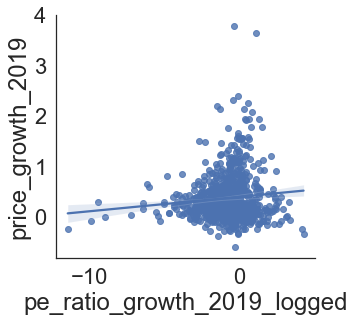

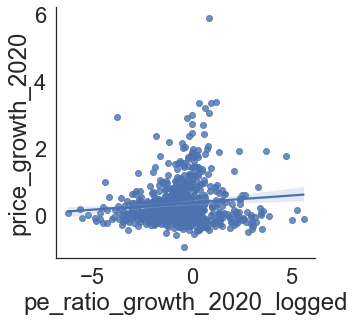

In [46]:
sns.lmplot(x="pe_ratio_growth_2015_logged", y="price_growth_2015", data=data_drop_outliers)
sns.lmplot(x="pe_ratio_growth_2016_logged", y="price_growth_2016", data=data_drop_outliers)
sns.lmplot(x="pe_ratio_growth_2017_logged", y="price_growth_2017", data=data_drop_outliers)
sns.lmplot(x="pe_ratio_growth_2018_logged", y="price_growth_2018", data=data_drop_outliers)
sns.lmplot(x="pe_ratio_growth_2019_logged", y="price_growth_2019", data=data_drop_outliers)
sns.lmplot(x="pe_ratio_growth_2020_logged", y="price_growth_2020", data=data_drop_outliers)

We use the lmplot to find the relationship between log(pe_ratio_growth) and price_growth. From the lmplot, we can see that the relationship between log(pe_ratio_growth) and price_growth in 2015, 2016, 2019, and 2020 are positive. And the relationship between log(pe_ratio_growth) and price_growth in 2017 and 2018 is negative. This result is a little different with the relationship between original pe_ratio_growth and price_growth. From the lmplot, we can more clearly see that all years' log pe_ratio_growth is in the range -5 to 5. The linear regression line is more fitted than pe_ratio_growth vs price_growth.

### Price Growth vs. log(net_profit_to_total_revenue)

<AxesSubplot:>

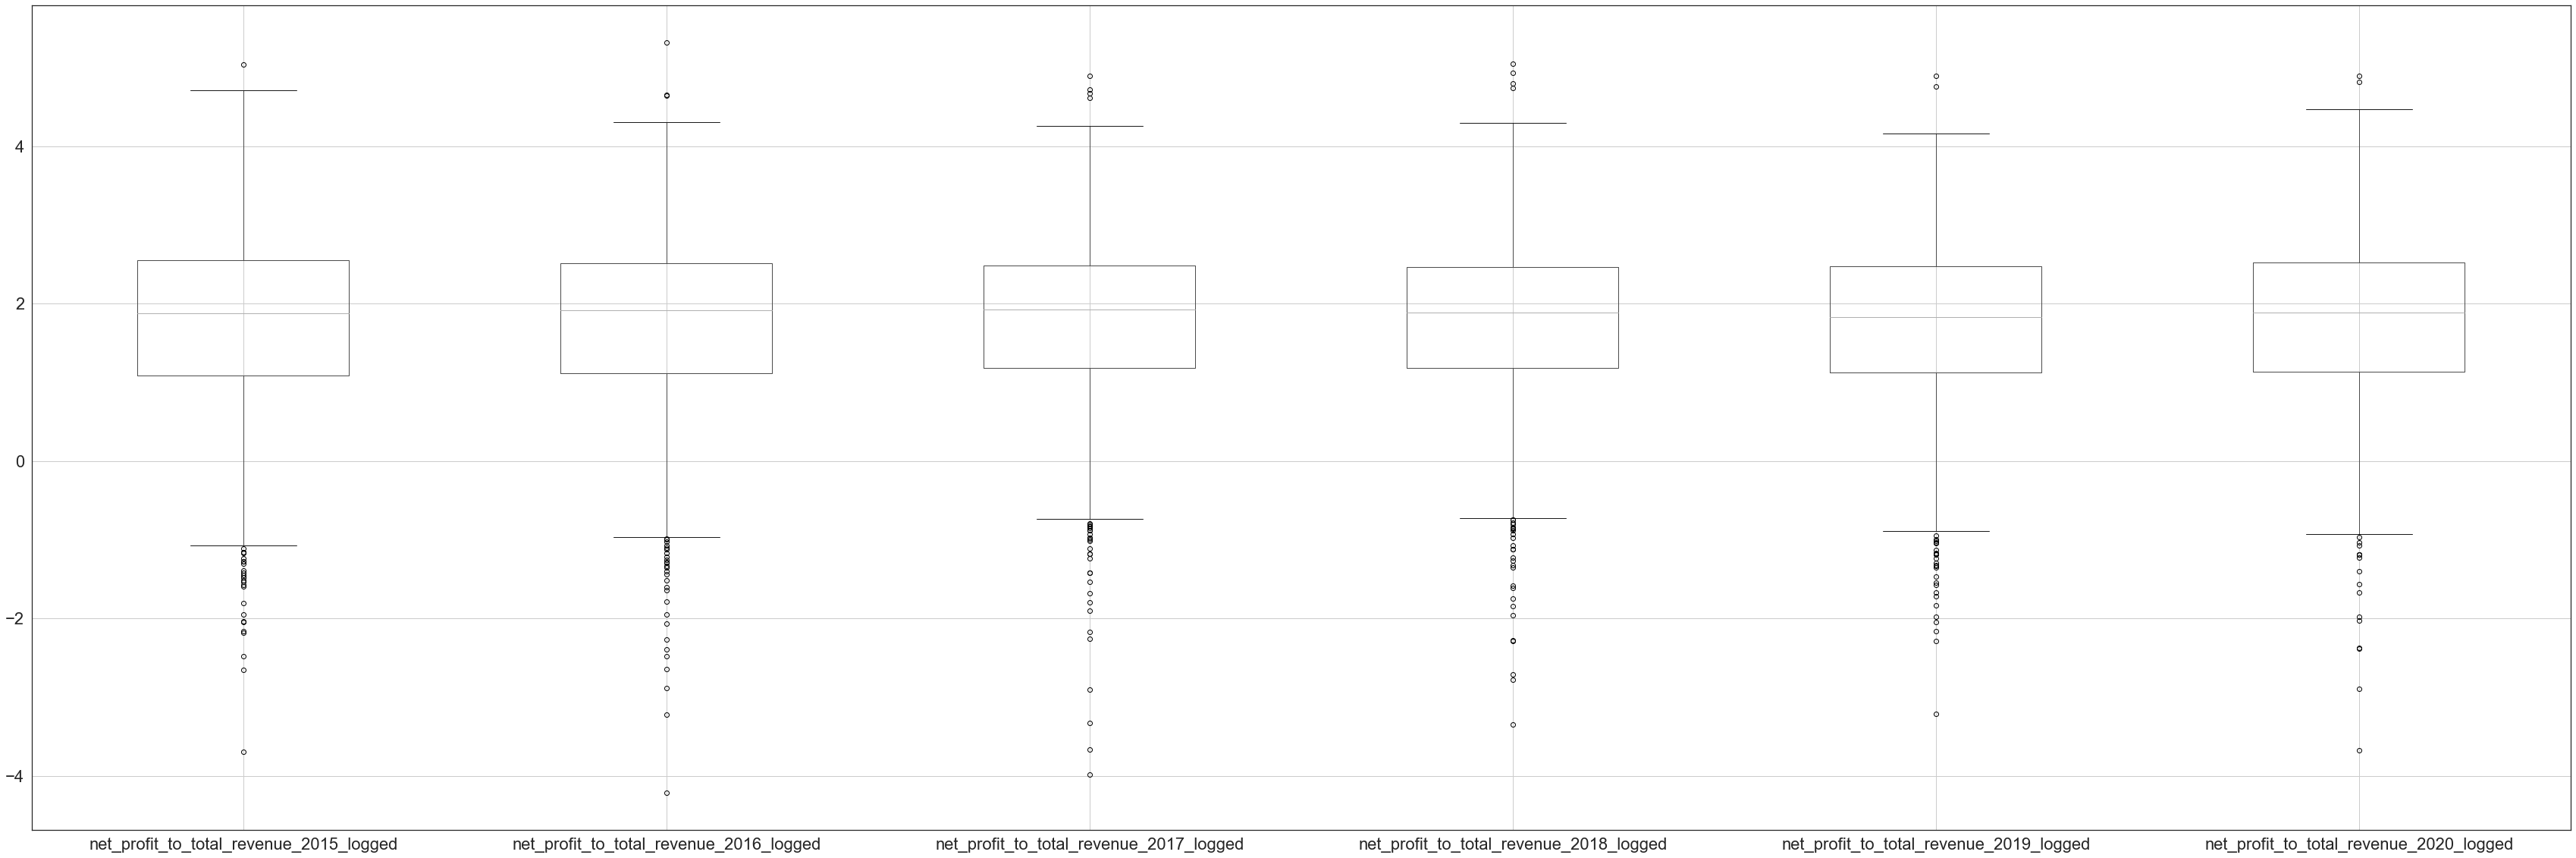

In [47]:
data_drop_outliers[["net_profit_to_total_revenue_2015_logged", "net_profit_to_total_revenue_2016_logged", "net_profit_to_total_revenue_2017_logged", "net_profit_to_total_revenue_2018_logged", "net_profit_to_total_revenue_2019_logged", "net_profit_to_total_revenue_2020_logged"]].boxplot()

The boxplot clearly shows us the range of all log values of net_profit_to_total_revenue, which excludes outlier. According to the boxplot, most of the stocks see the log values of the net_profit_to_total_revenue are between 0 and 3. The distribution mostly centers at around 1.8 or 1.9, since the box plot does not contain the firms that net_profit_to_total_revenue is 0 have a NaN values for log. The extreme values of the net_profit_to_total_revenue are up to -4 and 4. Since we are using the data after we drop the outliers and excludes the outlier data, the outlier data shown here are only the outlier for this set of data, instead of the raw data we are using. Therefore, we will not drop the outlier data here. 

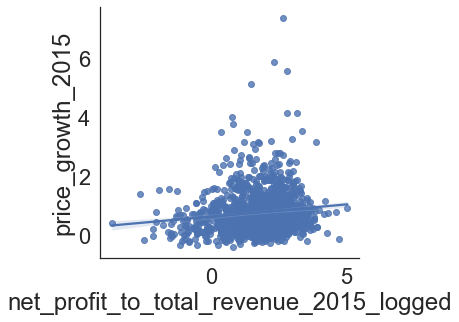

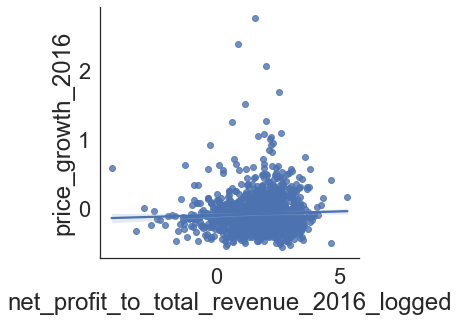

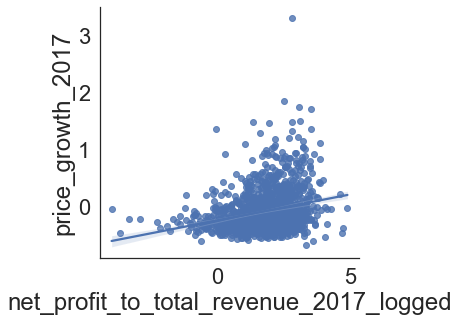

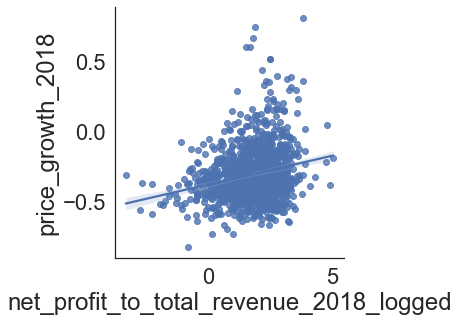

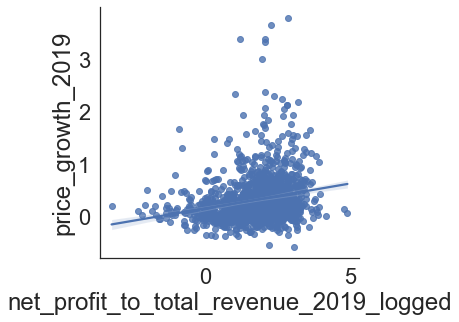

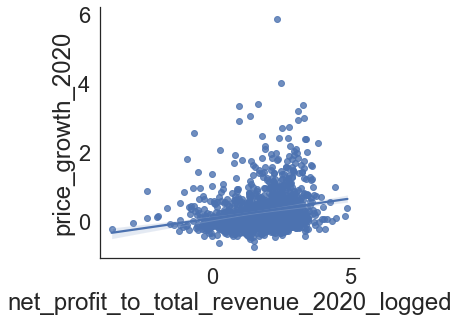

In [48]:
sns.lmplot(x="net_profit_to_total_revenue_2015_logged", y="price_growth_2015", data=data_drop_outliers)
sns.lmplot(x="net_profit_to_total_revenue_2016_logged", y="price_growth_2016", data=data_drop_outliers)
sns.lmplot(x="net_profit_to_total_revenue_2017_logged", y="price_growth_2017", data=data_drop_outliers)
sns.lmplot(x="net_profit_to_total_revenue_2018_logged", y="price_growth_2018", data=data_drop_outliers)
sns.lmplot(x="net_profit_to_total_revenue_2019_logged", y="price_growth_2019", data=data_drop_outliers)
sns.lmplot(x="net_profit_to_total_revenue_2020_logged", y="price_growth_2020", data=data_drop_outliers)

From the implot for the log scale of the net_profit_to_total_revenue, we can still see overall slight positive relationship between net_profit_to_total_revenue and the changes in stock price. Most of the stocks have net_profit_to_total_revenue centers around 2 or 3, which means that they are earning economic profit and doing quite well. Since we do not include the firms that net_profit_to_total_revenue is 0, most firms are at the right side of 0. The upward gradient is clear, and the shadow blue area is clearly smaller than the implot before without log scale, which means that the positive correlation is more evident. This trend is reasonable, since the higher ratio means that the firms that have higher profit margin will have higher stock price on that year, and therefore more people buy their stock. Consequently, the stock prices raise. Using the log scale, we can see the correlation clearer and better arrive at our conclusion. 

### Price Growth vs. log(roe)

<AxesSubplot:>

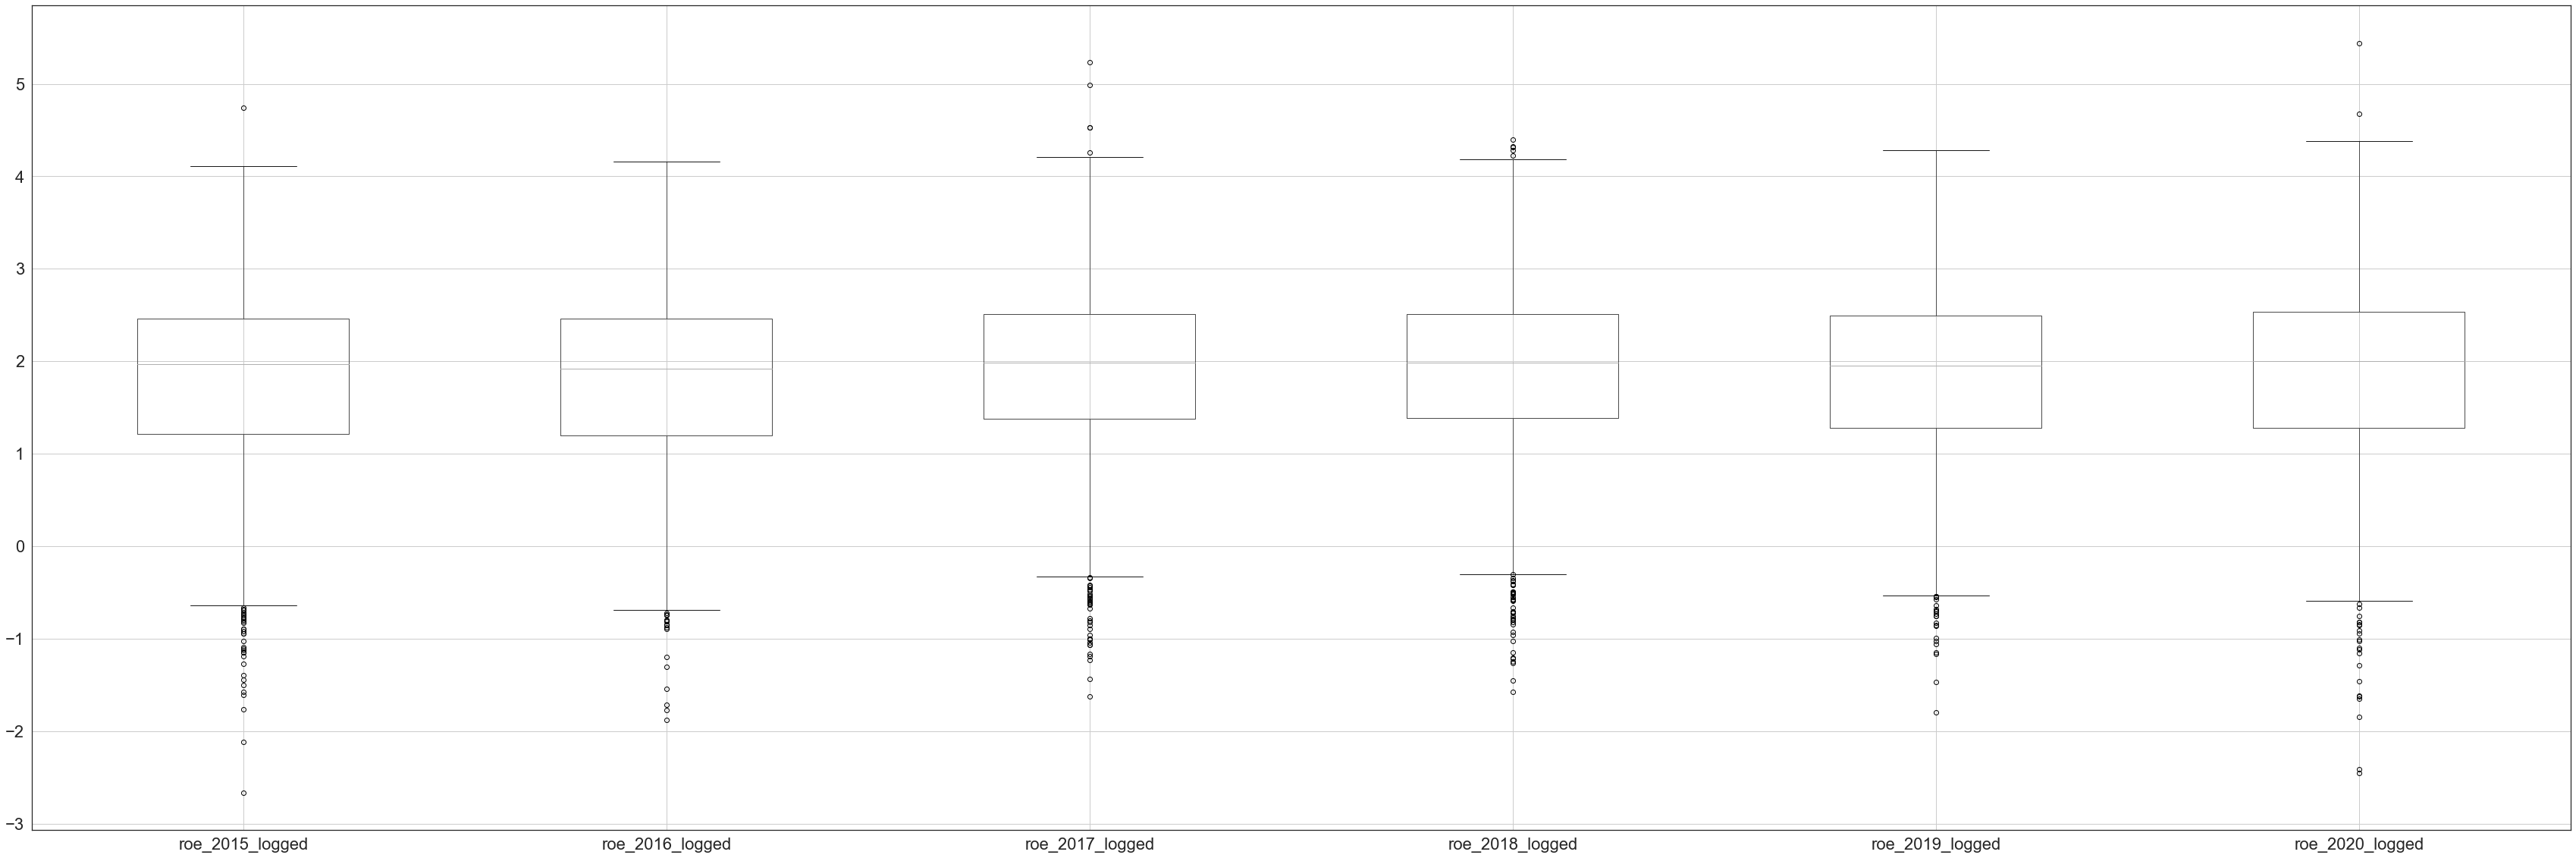

In [49]:
data_drop_outliers[["roe_2015_logged", "roe_2016_logged", "roe_2017_logged", "roe_2018_logged", "roe_2019_logged", "roe_2020_logged"]].boxplot()

This boxplot shows us the outlier data for the roe-logged distribution. According to the boxplot, most of the stocks have a roe-logged value between -1 to 4, centered around 2. The distribution looks less spread than before the transformation. The shape of the distribution are similar and normal for each year for the roe.

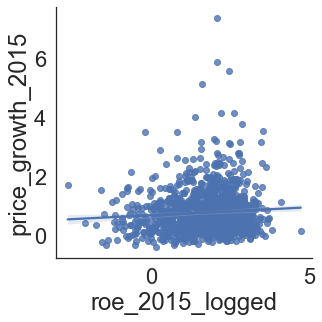

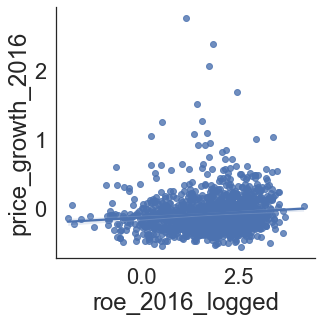

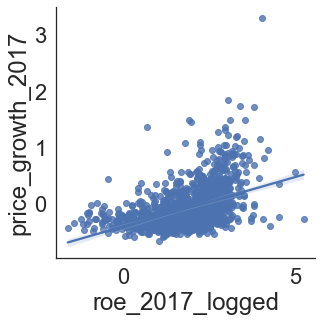

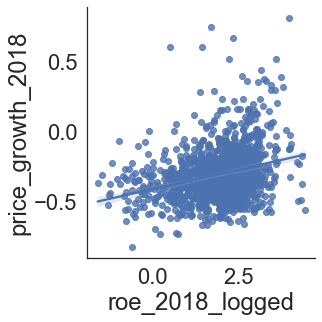

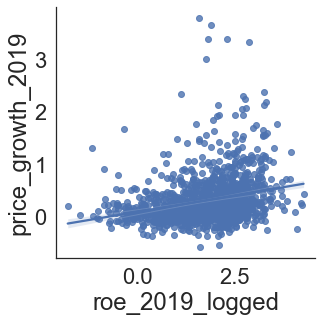

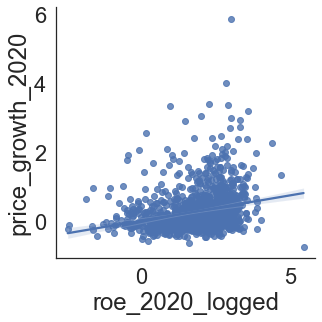

In [50]:
sns.lmplot(x="roe_2015_logged", y="price_growth_2015", data=data_drop_outliers)
sns.lmplot(x="roe_2016_logged", y="price_growth_2016", data=data_drop_outliers)
sns.lmplot(x="roe_2017_logged", y="price_growth_2017", data=data_drop_outliers)
sns.lmplot(x="roe_2018_logged", y="price_growth_2018", data=data_drop_outliers)
sns.lmplot(x="roe_2019_logged", y="price_growth_2019", data=data_drop_outliers)
sns.lmplot(x="roe_2020_logged", y="price_growth_2020", data=data_drop_outliers)

Since we saw the spread of roe is huge, we log-transformed the roe and draw the regression line on the logged roe and price growth. After normalizing the roe, we saw the relationship between roe and price growth much clearer- higher roe leads to higher price growth. On average, we see a clear upward trend with higher roe relate to higher price growth.

### OLS

In [51]:
for i in range(2015, 2021):
    df = data_drop_outliers[['net_profit_to_total_revenue_{}_logged'.format(i), 'roe_growth_{}_logged'.format(i), 'pe_ratio_growth_{}_logged'.format(i), 'price_growth_{}'.format(i), 'roe_{}_logged'.format(i)
                            ]].replace([np.inf, -np.inf], np.nan).dropna(subset=[
        'net_profit_to_total_revenue_{}_logged'.format(i), 'roe_growth_{}_logged'.format(i), 'pe_ratio_growth_{}_logged'.format(i), 'price_growth_{}'.format(i), 'roe_{}_logged'.format(i)
    ])
    df.columns = ['net_profit_to_total_revenue_logged', 'roe_growth_logged', 'pe_ratio_growth_logged', 'price_growth', "roe_logged"]
    outcome,predictors = patsy.dmatrices('price_growth~net_profit_to_total_revenue_logged+roe_growth_logged+pe_ratio_growth_logged+roe_logged', df)
    mod_log = sm.OLS(outcome, predictors)
    res_log = mod_log.fit()
    print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:           price_growth   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     21.16
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           1.10e-15
Time:                        15:21:57   Log-Likelihood:                -347.42
No. Observations:                 365   AIC:                             704.8
Df Residuals:                     360   BIC:                             724.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

### Result

Despite our plot looking much better than before, the OLS tests tell a different stories. With net_profit_to_total_revenue_logged, roe_growth_logged, pe_ratio_growth_logged, and roe_logged being x1, x2, x3, and x4, while some of x values show a significant p values in some years, most of them have large p values across the years. Even in the years when some of the x value have statistical significance, the largest beta is roe_logged in 2020 being 0.3767. This may seem rather large at first sight. However, considering x values are logged, this actually mean that in 2020, keeping all else constant, for every one percent increase in roe logged, we will see 0.003767 unit increase in price growth. Note that price growth is already measured in percentage. Thus, 0.003767 means 0.003767 percent increase in price, which is quite insignificant. Thus, even after logging our x values, we still fail to find any strong or useful relationship between net_profit_to_total_revenue_logged, roe_growth_logged, pe_ratio_growth_logged, and roe_logged versus price growth.

# Ethics & Privacy

For our research topics relating to ROE and its effects on the companies’ stock prices, we do not think there will be a privacy concern.ROE requires the average income of the firms and the equity of their shareholders. For all listed companies, the balance sheet and all other relevant financial information are publicly available to all investors and stakeholders. Moreover, the stock prices of all major stock markets, such as The New York Stock Exchange, Nasdaq, and Shanghai Stock exchanges, are publicly available and updated constantly for all financial practitioners and employees. We do not invade anyone’s privacy by checking the companies’ balance sheets to access the data we need and stock prices of those companies. Public companies' balance sheets(along with other financials like P & Ls and cash flows) are available in each of their quarterly and annual reports. Investment websites (like Yahoo Finance - Business Finance, Stock Market, Quotes, News or Online Stock Trading, Discount Online Brokerage) usually provide simplified versions of these balance sheets, and they are very easy to find. That financial information, as well as the stock prices, are not secret, but available in various means for tax purposes and other investment purposes.

On top of that, how JoinQuant get its data is unknown to us. If it uses web scraping to acquire more data related to ROE and stock prices, it can make the website traffic spike and may cause the breakdown of the website server. Excessive crawl rates can harm the servers of the website getting scraped. There is no rule against the legal limit of crawl rate in the view of federal courts. However, If data scraping overloads the server, then the person responsible for the damage can be prosecuted under the trespass to chattels’ law. To conclude, we should not submit requests, namely millions of times per second, and the normal requests rate does not seem to have a huge negative impact that burdened the website server.

Thirdly, how our results predict the stock prices of each company may affect its performance and strategies and expectations of the average individual investor. If we do successfully prove the positive correlation between ROE and stock prices, the companies with high ROE will attract more investment from individual investors. They could have better performance on the stock market, due to the multiplier effects. Meanwhile, the companies with low ROE, their performance could worsen. They may even fake their ROE to show a more positive image to investors and the markets. We all know how consumer expectations can actually impact the market. We do not wish that this correlation will impact how people behave and yield unintended results.

# Conclusion & Discussion

Our research question is: Is there a relationship between combination of (return on equity, pe ratio,net profit to total revenue) and Chinese stock price growth rate in percentage for companies within the consumer goods industry in 2014-2020? Our hypothesis is: There is a positive correlation between the return on equity, pe ratio, and net profit to total revenue and the Chinese stock price's growth rate for companies within the consumer goods industry in 2014-2020. We conclude from all the above analysis that there is indeed a relationship between stock price growth and return on equity (ROE), pe ratio, and net profit to total revenue, but the relationship is very weak. There is a positive relationship between stock price growth and ROE growth, ROE and net profit to total revenue growth. However, we do not have enough evidence to show whether the relationship between stock price growth and pe ratio growth is positive or negative. Through the analysis in the EDA section, we can easily find that the trend of stock price growth and pe ratio growth are different in each year, some of them have a positive relationship and some of them have a negative relationship. So we cannot say that there is a specific relationship between them. In addition, we also do OLS for a combination of the three variables. The results of R-squared are very small, which means that the stock price growth has only a negligible relationship with the combination of the three variables. They play a very small role in the process of stock price change.

# Limitations

Our data are selected for the period 2014-2020, but we do not take into account the economic impact of some unpredictable events (e.g., the COVID-19, where the economy is in a state of recession throughout the COVID-19) on the entire consumer goods industry. This also leads to some bias in the final results of our analysis. Besides, the scope of our data is the whole consumer goods industry, which is still very broad and contains many segments. Our analysis is still very broad and not specific to the smallest branch. We only consider whether there is a relationship between stock price growth and ROE, pe ratio, and net profit, but this is very limited. Because stock growth is also related to many other factors.

# Future Works

If we have the opportunity, we would like to go deeper into each of the smaller branches and analyze the relationship between stock price growth and other variables in each of the smaller industries. We can also explore more variables than just ROE, pe ratio, and net profit, since there are many more variables we can use. We can also try to predict the trend of stock price growth by the variables related to stock price growth, and try some linear regression model, decision tree model.

# Team Contributions

Irene Jiang
- Sourced dataset including basic information about stocks and the industry the stock is in.
- Comed up with research question and provided the background information for the question.
- Peer reviewed the data cleaning code and constructed steps/instructions for the EDA and further analysis code. 
- Wrote despcritions and analysis for the result and graphs 
- Presented the project to audience

Junlin Wu
- Wrote most of the code
- Assigned tasks to teammates
- Organzied notebooks
- Presented the project

Shixuan Wu
- Comments the code in the notebook with necessary steps and explanations
- Analyze the plot and results for interoperation
- Summarize the whole project for the overview
- Discuss the Ethics and privacy of our research


Mengyuan Zhang
- Some of EDA code
- Text analysis in EDA and Further Analysis
- Conclusion & Discussion & Limitations & Future Work
- Discuss data cleaning process and write some inline comment